# Introduction

In this project, I am working on the Heart Disease dataset to perform a classification task. The goal is to predict whether a person has heart disease or not based on different medical features. I will use two classification methods: Logistic Regression and k-Nearest Neighbors (k-NN).

I am following the theory and step-by-step methods from the books An Introduction to Statistical Learning (ISLR) and Probabilistic Machine Learning (PML) to understand how these algorithms work internally and Clear my understanding for concepts

The project includes data cleaning, preprocessing, correlation analysis, implementing logistic regression and k-NN from scratch, and finally evaluating the models using ROC, AUC, and confusion matrix. My focus is to understand the concepts deeply and apply them manually in Python.

In this code, I first imported the required libraries: numpy for numerical operations and pandas for handling data in tabular format. Then I loaded the Heart Disease dataset from a CSV file using pd.read_csv() and stored it in a DataFrame called Heart. Finally, I displayed the first 5 rows using .head() just to check how the data looks and to understand the structure of the dataset before applying any operations or analysis.



In [67]:
import pandas as pd
import numpy as np
# Loading the Dataset into a DataFrame


Heart=pd.read_csv("All Sample Data/Sample Data/Heart.csv")

# Displaying the firt 5 rows of the DataFrame for a quick overview of the data

Heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## Initial Data Exploration :
In this step, I am doing a basic overview of the dataset to understand its structure and contents.
* Heart.info(): This shows the number of columns, their data types, and if there are any missing (null) values in the dataset.
* Heart.describe(): This gives summary statistics like count, mean, standard deviation, min, 25%, 50% (median), 75%, and max for all numeric columns.
* Heart.head(): Displays the first 5 rows of the dataset to get a quick look at the actual data.
* Heart.shape: Tells the total number of rows and columns in the dataset.
* Heart.columns: Lists all the column names which helps in identifying which features are available.

This step helps in understanding the dataset before starting any cleaning or model building.



In [68]:
print(Heart.info())  # columns, data types, null values
print(Heart.describe())  # Calculating Count, mean ,std,min,25%,50%(median),75%,max
print(Heart.head()) # first 5 rows of datasets
print(Heart.shape)  # Shape of the dataset (rows, columns)
print(Heart.columns)  # column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None
       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.0

## Data Cleaning and Correlation Analysis :
* First, I loaded the dataset and removed the "Unnamed: 0" column since it's just an extra index.
* Then I checked for missing values using .isnull().sum(). If any row had missing data, I Replaced it by their Mean for numeric and mode for qualitative.
* After cleaning, I converted the target column AHD into numeric form: Yes = 1, No = 0 so we can use it later for logistic regression.
* Some features in the dataset are in object (text) form like ChestPain, Thal, etc. So I used one-hot encoding (with drop_first=True) to convert these into numeric columns.
* After that i have calculated correlation matrix.​
* I plotted a heatmap to visualize the correlation between features.
* Then, I printed the correlation of each feature with the target variable AHD to see which features are most related to heart disease.
* Finally, I identified my response variable as AHD and rest of the columns as predictor variables.

This step helps in understanding which features are important before building models like logistic regression or k-NN.


Missing Values in Each Column:
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

After Filling Missing Values:
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64
   Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
0   63    1     145   233    1        2    150      0      2.3      3  0.0   
1   67    1     160   286    0        2    108      1      1.5      2  3.0   
2   67    1     120   229    0        2    129      1      2.6      2  2.0   
3   37    1     130   250    0        0    187      0      3.5      3  0.0   
4   41    0     130   204    0        2    172      0      1.4      1  0.0   

   AHD  ChestPain_nonan

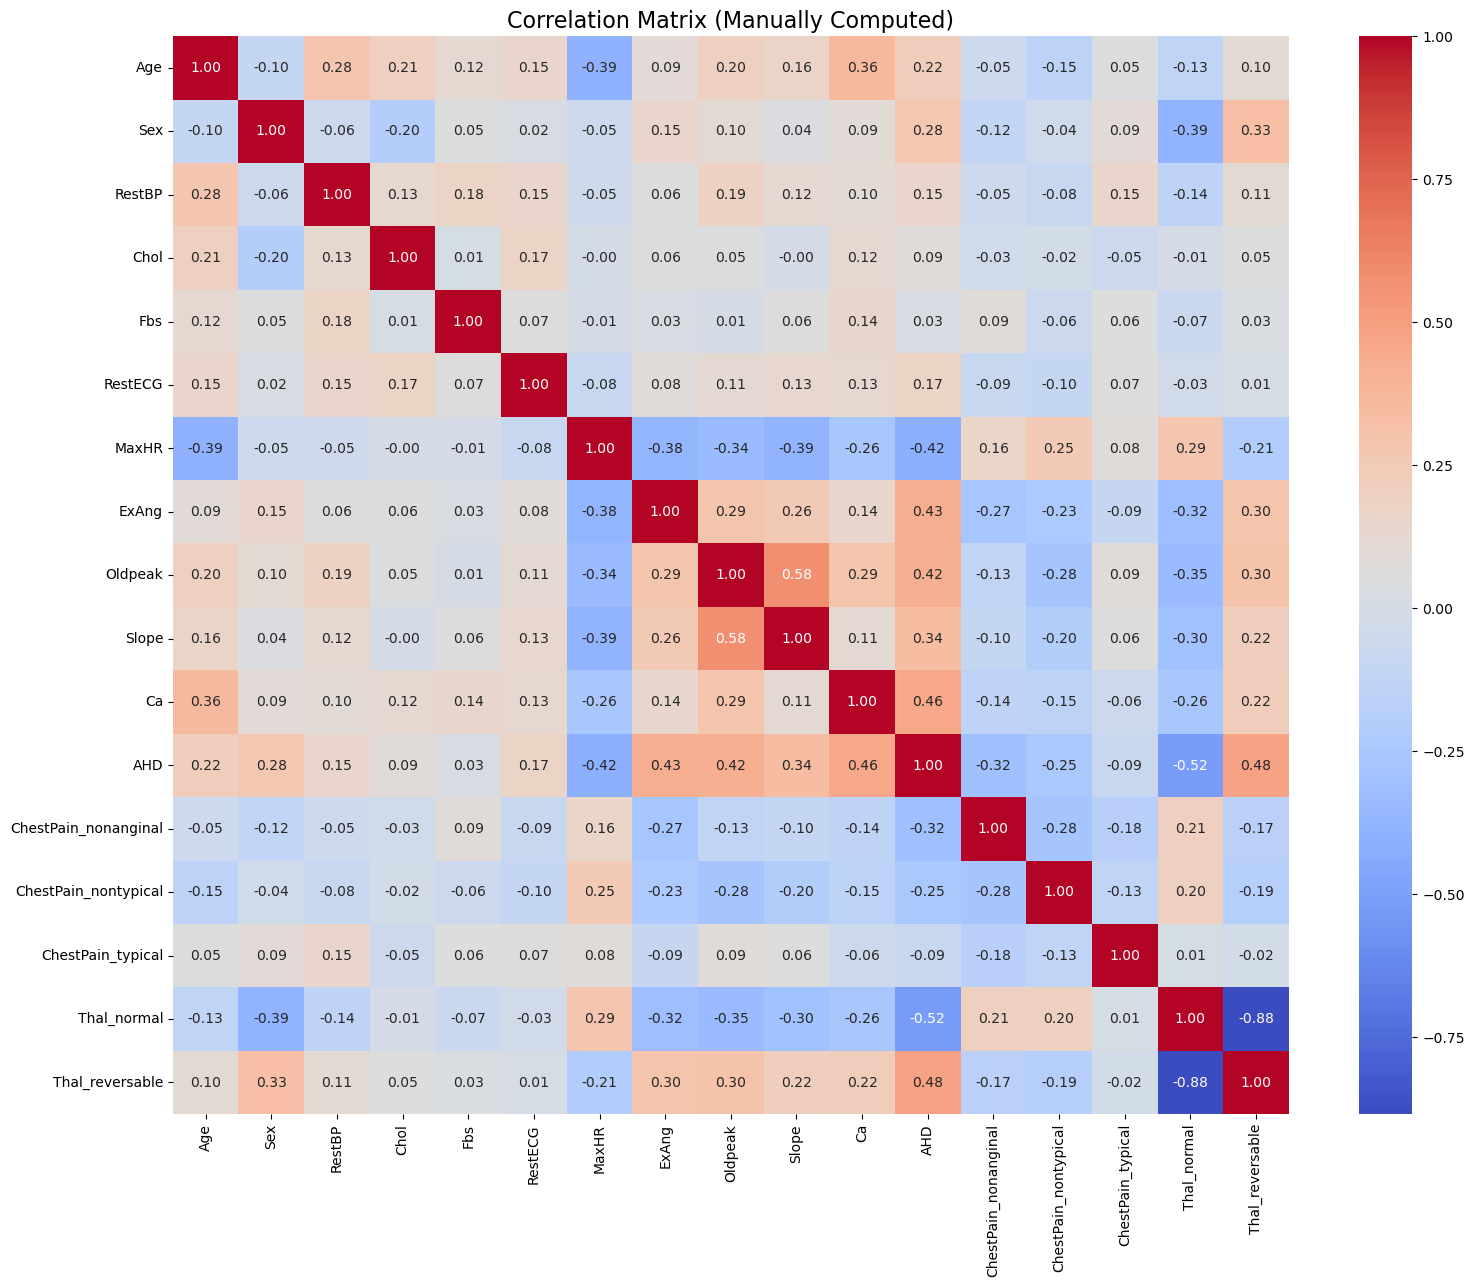

Correlation of Features with Target Variable (AHD):
AHD                     1.000000
Thal_reversable         0.480582
Ca                      0.457598
ExAng                   0.431894
Oldpeak                 0.424510
Slope                   0.339213
Sex                     0.276816
Age                     0.223120
RestECG                 0.169202
RestBP                  0.150825
Chol                    0.085164
Fbs                     0.025264
ChestPain_typical      -0.088806
ChestPain_nontypical   -0.248683
ChestPain_nonanginal   -0.315141
MaxHR                  -0.417167
Thal_normal            -0.520628
Name: AHD, dtype: float64
Response Variable: AHD
Predictor Variables (16): ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical', 'Thal_normal', 'Thal_reversable']


In [69]:

import matplotlib.pyplot as plt
import seaborn as sns
# loading the dataset
Heart=pd.read_csv("All Sample Data/Sample Data/Heart.csv")
if "Unnamed: 0" in Heart.columns:
    Heart.drop(columns=["Unnamed: 0"], inplace=True)

# Check for missing values
print("Missing Values in Each Column:")
print(Heart.isnull().sum())
# Fill numeric columns with mean
Heart.fillna(Heart.mean(numeric_only=True), inplace=True)

# Fill categorical columns with mode
for col in Heart.select_dtypes(include='object'):
    mode_val = Heart[col].mode()[0]
    Heart[col] = Heart[col].fillna(mode_val)

# Verify no missing values remain
print("\nAfter Filling Missing Values:")
print(Heart.isnull().sum())

# Convert target variable 'AHD' from Yes/No to 1/0
Heart['AHD'] = Heart['AHD'].map({'Yes': 1, 'No': 0})

# Find all categorical columns (dtype='object')
cat_cols = Heart.select_dtypes(include='object').columns.tolist()

# One-hot encode all categorical columns (drop_first=True to avoid dummy variable trap)
Heart = pd.get_dummies(Heart, columns=cat_cols, drop_first=True)
# Convert all boolean columns to integers (0/1)
bool_cols = Heart.select_dtypes(include='bool').columns
Heart[bool_cols] = Heart[bool_cols].astype(int)
# Now Heart is permanently updated with quantitative features
print(Heart.head())

#Manually compute correlation matrix using Pearson formulafor
# Pearson Correlation: corr(X, Y) = Cov(X, Y) / (std(X) * std(Y))
features = Heart.columns
correlation_matrix = pd.DataFrame(index=features, columns=features)

for i in features:
    for j in features:
        xi = Heart[i] - Heart[i].mean()
        xj = Heart[j] - Heart[j].mean()
        numerator = np.sum(xi * xj)
        denominator = np.sqrt(np.sum(xi ** 2)) * np.sqrt(np.sum(xj ** 2))
        correlation_matrix.loc[i, j] = numerator / denominator

# Convert the correlation matrix to float for heatmap plotting
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Manually Computed)", fontsize=16)
plt.show()

# Show correlation of each feature with the response variable (AHD)
print("Correlation of Features with Target Variable (AHD):")
ahd_corr = correlation_matrix["AHD"].sort_values(ascending=False)
print(ahd_corr)

# Determine response and predictors
response = "AHD"
predictors = [col for col in Heart.columns if col != response]
print(f"Response Variable: {response}")
print(f"Predictor Variables ({len(predictors)}): {predictors}")


# Simple Logistic Regression :
In this task, I applied Simple Logistic Regression to the Heart dataset to predict whether a person has AHD (Heart Disease) or not, based on the feature Thal_normal.

### What I did :
* Selected one predictor: Thal_normal
* Target variable: AHD (0 = No Heart Disease, 1 = Has Heart Disease)
* Used sigmoid function to map predictions between 0 and 1
* Defined and maximized the log-likelihood function inbuilt minimize function with method ='BFGS' to estimate the model parameters
* Plotted Actund Predicted Probabilities over Thal_normal
* Made predictions and converted them to binary outcomes using 0.5 threshold
* Calculated model accuracy and confusion matrix
* Finally, I did full model interpretation including:
    * Coefficients & Standard Errors
    * Confidence Intervals
    * z-values, p-values (for hypothesis testing)
    * McFadden’s R² to evaluate the model fit



## Predicting AHD Using Logistic Regression (with Thal_normal) :

After checking the correlation matrix, I noticed that the feature Thal_normal shows a strong negative relationship with the target variable AHD. So now, I will use logistic regression to predict the response variable AHD based on this single predictor Thal_normal. This will help me understand how well just one feature can predict heart disease, and also give me a basic idea of how logistic regression works step by step.

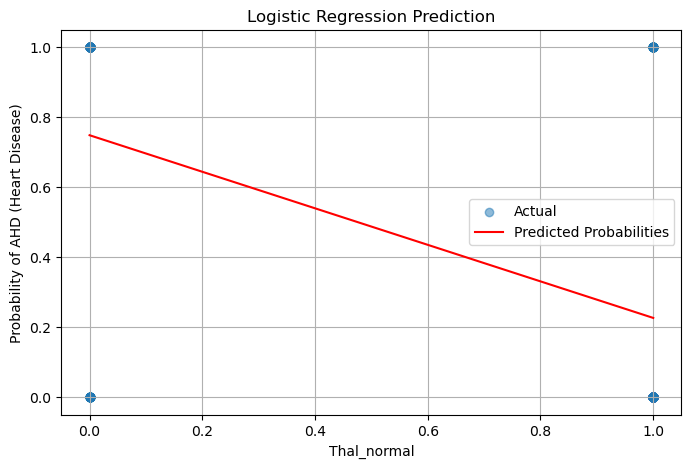

LOGISTIC REGRESSION MODEL SUMMARY 
Intercept (b0): 1.088760
Slope (b1):     -2.318708

Final Log-Likelihood: -166.006860

Standard Error of b0: 0.198274
Standard Error of b1: 0.270778

95% Confidence Interval for b0: [0.692211, 1.485309]
95% Confidence Interval for b1: [-2.860265, -1.777152]

z-value for b0: 5.4912
z-value for b1: -8.5631

p-value for b0: 0.000000
p-value for b1: 0.000000

Hypothesis Testing Results:
Reject Null Hypothesis for b0 (b0 ≠ 0)
Reject Null Hypothesis for b1 (b1 ≠ 0)

McFadden's R²: 0.205675
Reasonable fit

Confusion Matrix and Accuracy (at 0.5 threshold):
[[130  34]
 [ 38 101]]
Accuracy: 76.2376


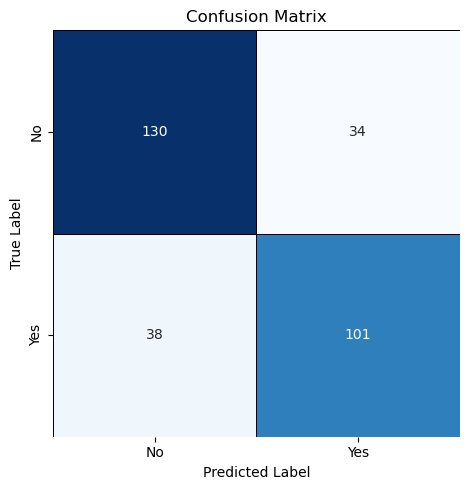

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.77      0.79      0.78       164
   Heart Disease       0.75      0.73      0.74       139

        accuracy                           0.76       303
       macro avg       0.76      0.76      0.76       303
    weighted avg       0.76      0.76      0.76       303



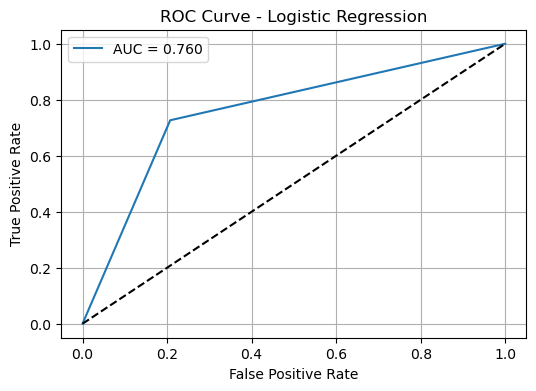

AUC Score: 0.7597


In [70]:
from scipy.optimize import minimize
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# Importing necessary libraries for logistic regression and it's evaluation

# Select Predictors and Response from dataset
x=Heart[['Thal_normal']].values.flatten()
y=Heart['AHD'].values

# Add intercept term
x_design=np.c_[np.ones(x.shape[0]),x]

# Defining sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

#  Defining the log likelihood function for estimating the parameters
def log_likelihood(beta, X, y):
    z = np.dot(X, beta)
    p = sigmoid(z)
    return -np.sum(y * np.log(p + 1e-9) + (1 - y) * np.log(1 - p + 1e-9))

beta=np.zeros(x_design.shape[1])

# Using the minimize function to find the optimal prameters (beta) that maximize the log likelihood 
result =minimize(log_likelihood,beta,args=(x_design,y),method='BFGS')

# Extracting the estimated parameters beta and log-likelihood value
beta_hat=result.x
ll_final=-result.fun # Fianl log-likelihood value after optimization

# Define hessian for standard error calculation
def hessian(beta, X):
    probs = sigmoid(X @ beta)
    W = np.diag(probs * (1 - probs)) # inside the diagonal funtion we are multiplying element wise and diagonal function converts one dim array to 2 dime array 
    hess=-(X.T @ W @ X) + np.eye(X.shape[1]) * 1e-9
    return hess


# Predicted probabilities
z = np.dot(x_design, beta_hat) # z is the predicted log-odds
p_hat_thn = sigmoid(z) # it is the predicted probabilities
y_pred_th = (p_hat_thn >= 0.5).astype(int) # Convert probabilities  to binary predictions

# Model evaluation
accuracy_thn = accuracy_score(y,y_pred_th) # Accuracy of the model


# Confusion matrix
conf_matrix_thn = confusion_matrix(y, y_pred_th)

# Visualize prediction probabilities vs. Thal_normal
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Actual', alpha=0.5)
plt.plot(x, p_hat_thn, 'r', label='Predicted Probabilities')
plt.xlabel('Thal_normal')
plt.ylabel('Probability of AHD (Heart Disease)')
plt.title('Logistic Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()


print("LOGISTIC REGRESSION MODEL SUMMARY ")

# Coefficients
b0,b1=beta_hat
print(f"Intercept (b0): {b0:.6f}")
print(f"Slope (b1):     {b1:.6f}")
print()

# Final Log-Likelihood
print(f"Final Log-Likelihood: {ll_final:.6f}")
print()


# Standard errors from inverse Hessian
Hessian = hessian(beta_hat, x_design)
cov_matrix = np.linalg.inv(-Hessian)
standard_errors = np.sqrt(np.diag(cov_matrix))
se_b0, se_b1 = standard_errors

print(f"Standard Error of b0: {se_b0:.6f}")
print(f"Standard Error of b1: {se_b1:.6f}")
print()

# Confidence Intervals (approx. 95% using ±2*SE)
ci_b0_l = b0 - 2 * se_b0
ci_b0_u = b0 + 2 * se_b0
ci_b1_l = b1 - 2 * se_b1
ci_b1_u = b1 + 2 * se_b1

print(f"95% Confidence Interval for b0: [{ci_b0_l:.6f}, {ci_b0_u:.6f}]")
print(f"95% Confidence Interval for b1: [{ci_b1_l:.6f}, {ci_b1_u:.6f}]")
print()

# z-values
z_b0 = b0 / se_b0
z_b1 = b1 / se_b1

print(f"z-value for b0: {z_b0:.4f}")
print(f"z-value for b1: {z_b1:.4f}")
print()

# p-values
p_b0 = 2 * stats.norm.sf(abs(z_b0))
p_b1 = 2 * stats.norm.sf(abs(z_b1))

print(f"p-value for b0: {p_b0:.6f}")
print(f"p-value for b1: {p_b1:.6f}")

# Hypothesis testing
print("\nHypothesis Testing Results:")
if p_b0 < 0.05:
    print("Reject Null Hypothesis for b0 (b0 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b0 (b0 = 0)")

if p_b1 < 0.05:
    print("Reject Null Hypothesis for b1 (b1 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b1 (b1 = 0)")

print()

# McFadden's R-squared

y_mean = np.mean(y)
ll_null = np.sum(y * np.log(y_mean + 1e-15) + (1 - y) * np.log(1 - y_mean + 1e-15))
mcfadden_r2 = 1 - (ll_final / ll_null)

print(f"McFadden's R²: {mcfadden_r2:.6f}")
if mcfadden_r2 > 0.4:
    print("Excellent fit")
elif mcfadden_r2 > 0.3:
    print("Very good fit")
elif mcfadden_r2 > 0.2:
    print("Reasonable fit")
else:
    print("Poor fit")
print()

# Classification Metrics (optional)
print("Confusion Matrix and Accuracy (at 0.5 threshold):")
print(conf_matrix_thn)
print(f"Accuracy: {accuracy_thn*100:.4f}")
# Visualize Confusion Matrix

# Define the class labels
labels = ["No", "Yes"]

# Create the heatmap with borders, annotations, and labels
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_thn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,linewidths=0.5,linecolor='black',cbar=False,square=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report 

print("Classification Report:")
print(classification_report(y, y_pred_th, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC 

fpr, tpr, _ = roc_curve(y, p_hat_thn)
auc_score = roc_auc_score(y, p_hat_thn)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")



## Evaluation and Visualization of Logistic Regression Model

### Model Summary (Thal\_normal as Predictor)

We used **Thal_normal**, a binary feature, to predict the presence of heart disease (**AHD**) using logistic regression. This model estimates the probability of heart disease based on whether a patient has a normal Thal test result or not.

---

### Visualization and Model Fit

To understand the behavior of the logistic regression model with the **Thal_normal** variable, we visualized the predicted probabilities along with the actual outcomes.

#### What the Plot Shows

* **Thal_normal** is a binary variable:

  * **0**: Thal test is not normal
  * **1**: Thal test is normal
* The plot displays:

  * Blue dots for actual values of **AHD** (0 or 1)
  * A red line showing predicted probabilities from the logistic regression model

#### Interpretation

* The red prediction line has a negative slope:

  * As **Thal_normal** goes from 0 to 1, the probability of heart disease decreases
* This indicates that patients with a normal Thal test are less likely to have heart disease
* Since **Thal_normal** is binary, the x-axis contains two clusters: one at 0 and one at 1

#### Real-Life Meaning

The model suggests that individuals with a normal Thal test are predicted to have a lower risk of heart disease, which aligns with typical medical understanding.

---

### Confusion Matrix

The confusion matrix evaluates the model’s classification performance at a probability threshold of 0.5.


#### Matrix Labels

* **0** = No heart disease
* **1** = Yes, heart disease present

#### Interpretation

* Top-left (True Negative): Correctly predicted no disease
* Top-right (False Positive): Predicted disease when none present
* Bottom-left (False Negative): Missed actual case of disease
* Bottom-right (True Positive): Correctly predicted heart disease

---

### Classification Report

This includes detailed classification metrics.

#### Metrics Included

* Precision: Proportion of correct positive predictions
* Recall: Proportion of actual positives correctly predicted
* F1-score: Harmonic mean of precision and recall
* Support: Number of observations in each class

---

### Logistic Regression Evaluation Metrics

| Metric                | Description                                                            |
| --------------------- | ---------------------------------------------------------------------- |
| Accuracy              | Proportion of total correct predictions                                |
| Log-Likelihood        | Measures model fit; higher (less negative) is better                   |
| McFadden’s R²         | Pseudo R² value indicating overall fit quality                         |
| Standard Errors (SE)  | Indicates variability in the coefficient estimates                     |
| z-values and p-values | For hypothesis testing of each coefficient (null hypothesis: beta = 0) |
| Confidence Intervals  | 95% confidence intervals for the coefficients                          |

---

### Final Remarks

The logistic regression model using only the **Thal_normal** predictor provides valuable insight into heart disease risk. The model shows a statistically significant and interpretable relationship: patients with normal Thal results are at a lower risk. The model fit is supported by log-likelihood, McFadden’s R², hypothesis tests, and classification accuracy.




## Predicting AHD Using Logistic Regression (with Thal_reversable) :

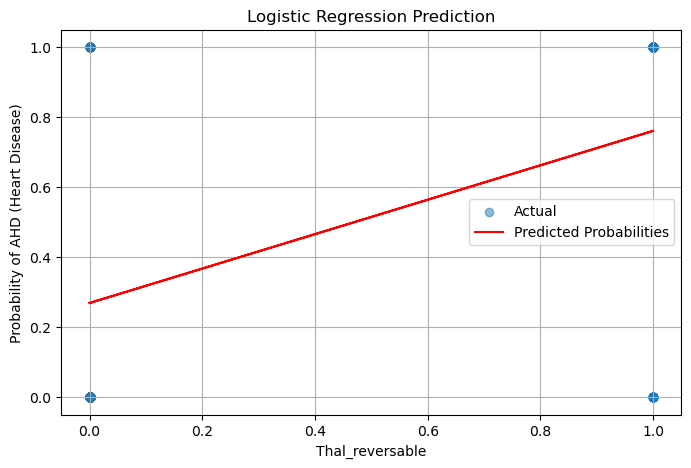

LOGISTIC REGRESSION MODEL SUMMARY 
Intercept (b0): -1.000632
Slope (b1):     2.157064

Final Log-Likelihood: -172.650654

Standard Error of b0: 0.165387
Standard Error of b1: 0.272586

95% Confidence Interval for b0: [-1.331406, -0.669857]
95% Confidence Interval for b1: [1.611892, 2.702236]

z-value for b0: -6.0502
z-value for b1: 7.9133

p-value for b0: 0.000000
p-value for b1: 0.000000

Hypothesis Testing Results:
Reject Null Hypothesis for b0 (b0 ≠ 0)
Reject Null Hypothesis for b1 (b1 ≠ 0)

McFadden's R²: 0.173885
Poor fit

Confusion Matrix and Accuracy (at 0.5 threshold):
[[136  28]
 [ 50  89]]
Accuracy: 74.2574


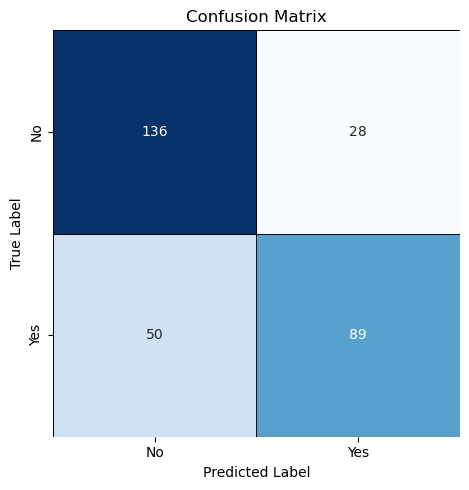

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.73      0.83      0.78       164
   Heart Disease       0.76      0.64      0.70       139

        accuracy                           0.74       303
       macro avg       0.75      0.73      0.74       303
    weighted avg       0.74      0.74      0.74       303



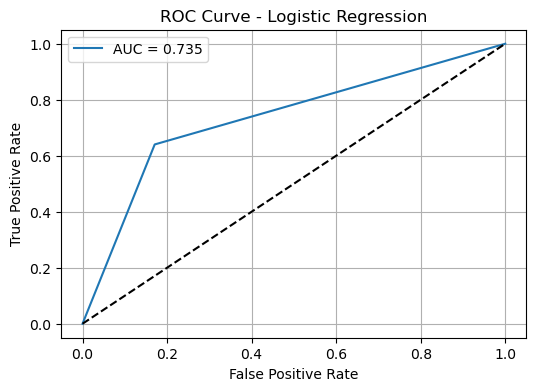

AUC Score: 0.7348


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy import stats

# Select Predictors and Response from dataset
x=Heart[['Thal_reversable']].values.flatten()
y=Heart['AHD'].values

# Add intercept term
x_design=np.c_[np.ones(x.shape[0]),x]

# Defining sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

#  Defining the log likelihood function for estimating the parameters
def log_likelihood(beta, X, y):
    z = np.dot(X, beta)
    p = sigmoid(z)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
beta=np.zeros(x_design.shape[1])

# Using the minimize function to find the optimal prameters (beta) that maximize the log likelihood 
result =minimize(log_likelihood,beta,args=(x_design,y),method='BFGS')

# Extracting the estimated parameters beta and log-likelihood value
beta_hat=result.x
ll_final=-result.fun # Fianl log-likelihood value after optimization


# Define hessian for standard error calculation
def hessian(beta, X):
    probs = sigmoid(X @ beta)
    W = np.diag(probs * (1 - probs)) # inside the diagonal funtion we are multiplying element wise and diagonal function converts one dim array to 2 dime array 
    hess=-(X.T @ W @ X) + np.eye(X.shape[1]) * 1e-9
    return hess


# Predicted probabilities
z = np.dot(x_design, beta_hat) # z is the predicted log-odds
p_hat = sigmoid(z) # it is the predicted probabilities
y_pred = (p_hat >= 0.5).astype(int) # Convert probabilities  to binary predictions

# Model evaluation
accuracy = accuracy_score(y,y_pred) # Accuracy of the model



# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)


# Visualize prediction probabilities vs. Thal_normal
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Actual', alpha=0.5)
plt.plot(x, p_hat, 'r', label='Predicted Probabilities')
plt.xlabel('Thal_reversable')
plt.ylabel('Probability of AHD (Heart Disease)')
plt.title('Logistic Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()


print("LOGISTIC REGRESSION MODEL SUMMARY ")

# Coefficients
b0,b1=beta_hat
print(f"Intercept (b0): {b0:.6f}")
print(f"Slope (b1):     {b1:.6f}")
print()

# Final Log-Likelihood
print(f"Final Log-Likelihood: {ll_final:.6f}")
print()


# Standard errors from inverse Hessian
Hessian = hessian(beta_hat, x_design)
cov_matrix = np.linalg.inv(-Hessian)
standard_errors = np.sqrt(np.diag(cov_matrix))
se_b0, se_b1 = standard_errors

print(f"Standard Error of b0: {se_b0:.6f}")
print(f"Standard Error of b1: {se_b1:.6f}")
print()

# Confidence Intervals (approx. 95% using ±2*SE)
ci_b0_l = b0 - 2 * se_b0
ci_b0_u = b0 + 2 * se_b0
ci_b1_l = b1 - 2 * se_b1
ci_b1_u = b1 + 2 * se_b1

print(f"95% Confidence Interval for b0: [{ci_b0_l:.6f}, {ci_b0_u:.6f}]")
print(f"95% Confidence Interval for b1: [{ci_b1_l:.6f}, {ci_b1_u:.6f}]")
print()

# z-values
z_b0 = b0 / se_b0
z_b1 = b1 / se_b1

print(f"z-value for b0: {z_b0:.4f}")
print(f"z-value for b1: {z_b1:.4f}")
print()

# p-values
p_b0 = 2 * stats.norm.sf(abs(z_b0))
p_b1 = 2 * stats.norm.sf(abs(z_b1))

print(f"p-value for b0: {p_b0:.6f}")
print(f"p-value for b1: {p_b1:.6f}")

# Hypothesis testing
print("\nHypothesis Testing Results:")
if p_b0 < 0.05:
    print("Reject Null Hypothesis for b0 (b0 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b0 (b0 = 0)")

if p_b1 < 0.05:
    print("Reject Null Hypothesis for b1 (b1 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b1 (b1 = 0)")

print()

# McFadden's R-squared

y_mean = np.mean(y)
ll_null = np.sum(y * np.log(y_mean) + (1 - y) * np.log(1 - y_mean))
mcfadden_r2 = 1 - (ll_final / ll_null)

print(f"McFadden's R²: {mcfadden_r2:.6f}")
if mcfadden_r2 > 0.4:
    print("Excellent fit")
elif mcfadden_r2 > 0.3:
    print("Very good fit")
elif mcfadden_r2 > 0.2:
    print("Reasonable fit")
else:
    print("Poor fit")
print()

# Classification Metrics (optional)
print("Confusion Matrix and Accuracy (at 0.5 threshold):")
print(conf_matrix)
print(f"Accuracy: {accuracy*100:.4f}")
# Visualize Confusion Matrix

# Define the class labels
labels = ["No", "Yes"]

# Create the heatmap with borders, annotations, and labels
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,linewidths=0.5,linecolor='black',cbar=False,square=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report 

print("Classification Report:")
print(classification_report(y, y_pred, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC 

fpr, tpr, _ = roc_curve(y, p_hat)
auc_score = roc_auc_score(y, p_hat)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")


##  Visualization & Model Fit (Thal_reversable) :
To explore how Thal_reversable (a binary variable) influences heart disease (AHD), we visualized actual outcomes vs. predicted probabilities from our logistic regression model.
#### What the Plot Shows:
* Thal_reversable values:
    * 0 → No reversible defect
    * 1 → Reversible defect
* Blue dots: Actual heart disease status (0 or 1)
* Red line: Predicted probability of heart disease

#### Interpretation:
* The red curve has a positive slope:
    * As Thal_reversable changes from 0 to 1, the probability of heart disease increases.
* Clear jump between the two groups shows that this feature strongly separates patients with and without disease.

#### Real-Life Meaning:
* Patients with a reversible thalassemia defect are more likely to have heart disease.
This aligns with medical expectations—reversible defects often indicate abnormal stress test results, signaling compromised heart function.

## Predicting AHD Using Logistic Regression (with MaxHR) :

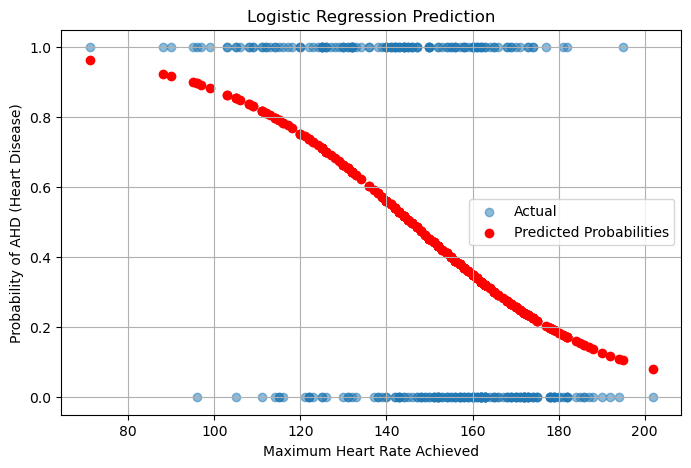

LOGISTIC REGRESSION MODEL SUMMARY 
Intercept (b0): 6.325015
Slope (b1):     -0.043412

Final Log-Likelihood: -180.451053

Standard Error of b0: 0.984371
Standard Error of b1: 0.006510

95% Confidence Interval for b0: [4.356273, 8.293757]
95% Confidence Interval for b1: [-0.056432, -0.030391]

z-value for b0: 6.4254
z-value for b1: -6.6680

p-value for b0: 0.000000
p-value for b1: 0.000000

Hypothesis Testing Results:
Reject Null Hypothesis for b0 (b0 ≠ 0)
Reject Null Hypothesis for b1 (b1 ≠ 0)

McFadden's R²: 0.136561
Poor fit

Confusion Matrix and Accuracy (at 0.5 threshold):
[[129  35]
 [ 56  83]]
Accuracy: 69.9670


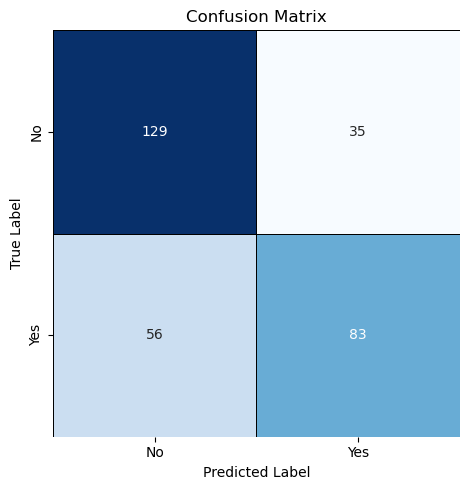

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.70      0.79      0.74       164
   Heart Disease       0.70      0.60      0.65       139

        accuracy                           0.70       303
       macro avg       0.70      0.69      0.69       303
    weighted avg       0.70      0.70      0.70       303



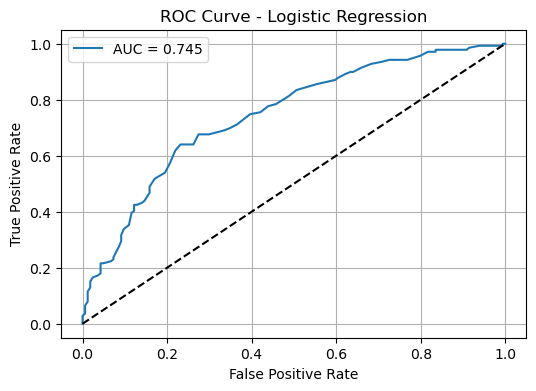

AUC Score: 0.7453


In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy import stats

# Select Predictors and Response from dataset
x=Heart[['MaxHR']].values.flatten()
y=Heart['AHD'].values

# Add intercept term
x_design=np.c_[np.ones(x.shape[0]),x]

# Defining sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

#  Defining the log likelihood function for estimating the parameters
def log_likelihood(beta, X, y):
    z = np.dot(X, beta)
    p = sigmoid(z)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
beta=np.zeros(x_design.shape[1])
# Using the minimize function to find the optimal prameters (beta) that maximize the log likelihood 
result =minimize(log_likelihood,beta,args=(x_design,y),method='BFGS')

# Extracting the estimated parameters beta and log-likelihood value
beta_hat=result.x
ll_final=-result.fun # Fianl log-likelihood value after optimization


# Define hessian for standard error calculation
def hessian(beta, X):
    probs = sigmoid(X @ beta)
    W = np.diag(probs * (1 - probs)) # inside the diagonal funtion we are multiplying element wise and diagonal function converts one dim array to 2 dime array 
    hess=-(X.T @ W @ X) + np.eye(X.shape[1]) * 1e-9
    return hess


# Predicted probabilities
z = np.dot(x_design, beta_hat) # z is the predicted log-odds
p_hat = sigmoid(z) # it is the predicted probabilities
y_pred = (p_hat >= 0.5).astype(int) # Convert probabilities  to binary predictions

# Model evaluation
accuracy = accuracy_score(y,y_pred) # Accuracy of the model



# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)


# Visualize prediction probabilities vs. Thal_normal
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Actual', alpha=0.5)
plt.scatter(x, p_hat, color='r', label='Predicted Probabilities')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Probability of AHD (Heart Disease)')
plt.title('Logistic Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()


print("LOGISTIC REGRESSION MODEL SUMMARY ")

# Coefficients
b0,b1=beta_hat
print(f"Intercept (b0): {b0:.6f}")
print(f"Slope (b1):     {b1:.6f}")
print()

# Final Log-Likelihood
print(f"Final Log-Likelihood: {ll_final:.6f}")
print()


# Standard errors from inverse Hessian
Hessian = hessian(beta_hat, x_design)
cov_matrix = np.linalg.inv(-Hessian)
standard_errors = np.sqrt(np.diag(cov_matrix))
se_b0, se_b1 = standard_errors

print(f"Standard Error of b0: {se_b0:.6f}")
print(f"Standard Error of b1: {se_b1:.6f}")
print()

# Confidence Intervals (approx. 95% using ±2*SE)
ci_b0_l = b0 - 2 * se_b0
ci_b0_u = b0 + 2 * se_b0
ci_b1_l = b1 - 2 * se_b1
ci_b1_u = b1 + 2 * se_b1

print(f"95% Confidence Interval for b0: [{ci_b0_l:.6f}, {ci_b0_u:.6f}]")
print(f"95% Confidence Interval for b1: [{ci_b1_l:.6f}, {ci_b1_u:.6f}]")
print()

# z-values
z_b0 = b0 / se_b0
z_b1 = b1 / se_b1

print(f"z-value for b0: {z_b0:.4f}")
print(f"z-value for b1: {z_b1:.4f}")
print()

# p-values
p_b0 = 2 * stats.norm.sf(abs(z_b0))
p_b1 = 2 * stats.norm.sf(abs(z_b1))

print(f"p-value for b0: {p_b0:.6f}")
print(f"p-value for b1: {p_b1:.6f}")

# Hypothesis testing
print("\nHypothesis Testing Results:")
if p_b0 < 0.05:
    print("Reject Null Hypothesis for b0 (b0 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b0 (b0 = 0)")

if p_b1 < 0.05:
    print("Reject Null Hypothesis for b1 (b1 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b1 (b1 = 0)")

print()

# McFadden's R-squared

y_mean = np.mean(y)
ll_null = np.sum(y * np.log(y_mean) + (1 - y) * np.log(1 - y_mean))
mcfadden_r2 = 1 - (ll_final / ll_null)

print(f"McFadden's R²: {mcfadden_r2:.6f}")
if mcfadden_r2 > 0.4:
    print("Excellent fit")
elif mcfadden_r2 > 0.3:
    print("Very good fit")
elif mcfadden_r2 > 0.2:
    print("Reasonable fit")
else:
    print("Poor fit")
print()

# Classification Metrics (optional)
print("Confusion Matrix and Accuracy (at 0.5 threshold):")
print(conf_matrix)
print(f"Accuracy: {accuracy*100:.4f}")

# Visualize Confusion Matrix

# Define the class labels
labels = ["No", "Yes"]

# Create the heatmap with borders, annotations, and labels
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,linewidths=0.5,linecolor='black',cbar=False,square=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report 

print("Classification Report:")
print(classification_report(y, y_pred, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC 

fpr, tpr, _ = roc_curve(y, p_hat)
auc_score = roc_auc_score(y, p_hat)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")

## Visualization & Model Fit (MaxHR)
We modeled the effect of MaxHR (Maximum Heart Rate Achieved) on heart disease (AHD) using logistic regression and visualized the actual vs. predicted outcomes.
#### What the Plot Shows:
* X-axis: MaxHR
* Blue Dots: Actual heart disease status (AHD = 0 or 1)
* Red Curve: Predicted probability of heart disease
#### Interpretation:
* The red curve is S-shaped (sigmoid), typical of logistic regression:
    * It starts near 1 for low MaxHR values (high risk)
    * Drops smoothly around the threshold
    * Levels off near 0 for high MaxHR values (low risk)
    * This shape reflects how probability transitions gradually, not abruptly.
#### Real-Life Meaning:
People with low MaxHR are more likely to have heart disease.
As MaxHR increases, risk decreases, and the curve shows a smooth transition from high to low probability—just like in real scenarios where changes in health risk are not binary but gradual

# Multiple Logistic Regression :
In this case i am using more than one predictor which may be qualitative and quantative . We Estimate our parameter same as simple linear regression which is maximize likelihood function.
Now i am predicting AHD using MaxHR and Thal_reversable both as predictor.

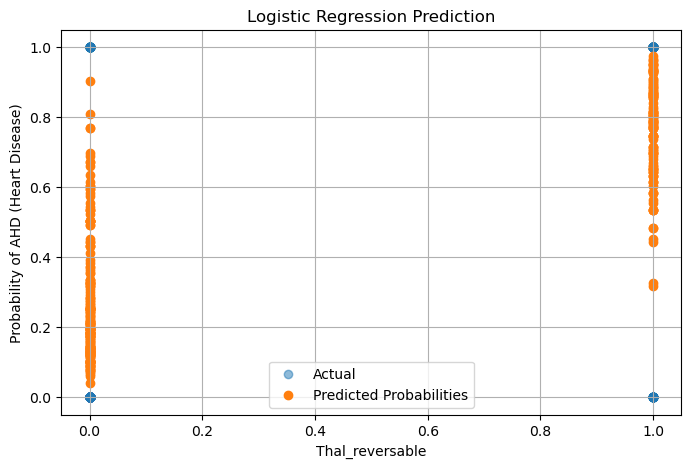

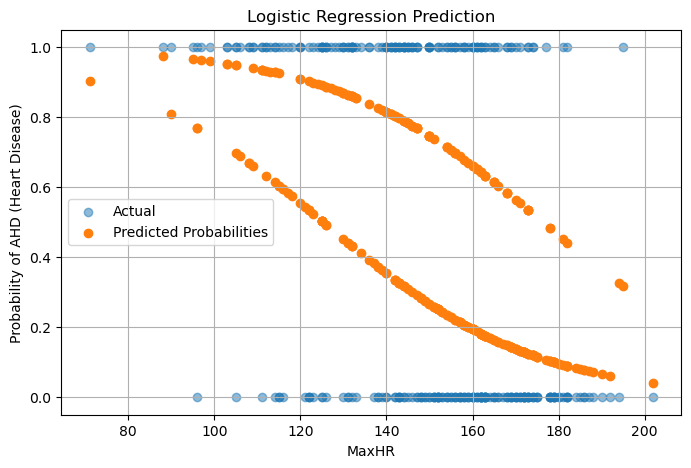

LOGISTIC REGRESSION MODEL SUMMARY 
Intercept (b0): 5.136708
Slope (b1):     2.089350
Slope (b2): -0.040991
Final Log-Likelihood: -151.720246
Standard Error of b0: 1.042158
Standard Error of b1: 0.293981
Standard Error of b2: 0.006975
95% Confidence Interval for b0: [3.052391, 7.221024]
95% Confidence Interval for b1: [1.501389, 2.677311]
95% Confidence Interval for b2: [-0.054940, -0.027042]
z-value for b0: 4.9289
z-value for b1: 7.1071
z-value for b2: -5.8772
p-value for b0: 0.000001
p-value for b1: 0.000000
p-value for b2: 0.000000

Hypothesis Testing Results:
Reject Null Hypothesis for b0 (b0 ≠ 0)
Reject Null Hypothesis for b1 (b1 ≠ 0)
Reject Null Hypothesis for b2 (b2 ≠ 0)
McFadden's R²: 0.274035
Reasonable fit
Confusion Matrix and Accuracy (at 0.5 threshold):
[[127  37]
 [ 36 103]]
Accuracy: 75.9076


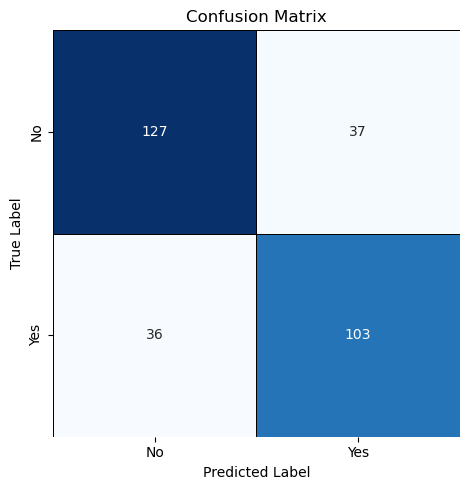

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.78      0.77      0.78       164
   Heart Disease       0.74      0.74      0.74       139

        accuracy                           0.76       303
       macro avg       0.76      0.76      0.76       303
    weighted avg       0.76      0.76      0.76       303



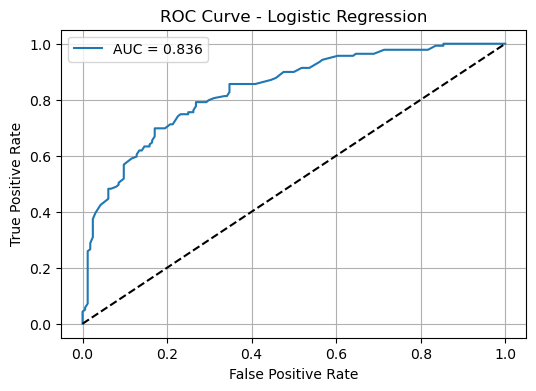

AUC Score: 0.8355


In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy import stats

# Select Predictors and Response from dataset
x1=Heart[['Thal_reversable']].values.flatten()
x2=Heart[['MaxHR']].values.flatten()
y=Heart['AHD'].values

# Add intercept term
x_design=np.c_[np.ones(x.shape[0]),x1,x2]

# Defining sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

#  Defining the log likelihood function for estimating the parameters
def log_likelihood(beta, X, y):
    z = np.dot(X, beta)
    p = sigmoid(z)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
beta=np.zeros(x_design.shape[1])
# Using the minimize function to find the optimal prameters (beta) that maximize the log likelihood 
result =minimize(log_likelihood,beta,args=(x_design,y),method='BFGS')

# Extracting the estimated parameters beta and log-likelihood value
beta_hat=result.x
ll_final=-result.fun # Fianl log-likelihood value after optimization

# Define hessian for standard error calculation
def hessian(beta, X):
    probs = sigmoid(X @ beta)
    W = np.diag(probs * (1 - probs)) # inside the diagonal funtion we are multiplying element wise and diagonal function converts one dim array to 2 dime array 
    hess=-(X.T @ W @ X) + np.eye(X.shape[1]) * 1e-9
    return hess


# Predicted probabilities
z = np.dot(x_design, beta_hat) # z is the predicted log-odds
p_hat = sigmoid(z) # it is the predicted probabilities
y_pred = (p_hat >= 0.5).astype(int) # Convert probabilities  to binary predictions

# Model evaluation
accuracy = accuracy_score(y,y_pred) # Accuracy of the model



# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)


# Visualize prediction probabilities vs. Thal_reversable
plt.figure(figsize=(8, 5))
plt.scatter(x1, y, label='Actual', alpha=0.5)
plt.scatter(x1, p_hat, label='Predicted Probabilities')
plt.xlabel('Thal_reversable')
plt.ylabel('Probability of AHD (Heart Disease)')
plt.title('Logistic Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()


# Visualize prediction probabilities vs. Thal_normal
plt.figure(figsize=(8, 5))
plt.scatter(x2, y, label='Actual', alpha=0.5)
plt.scatter(x2, p_hat, label='Predicted Probabilities')
plt.xlabel('MaxHR')
plt.ylabel('Probability of AHD (Heart Disease)')
plt.title('Logistic Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()


print("LOGISTIC REGRESSION MODEL SUMMARY ")

# Coefficients
b0,b1,b2=beta_hat
print(f"Intercept (b0): {b0:.6f}")
print(f"Slope (b1):     {b1:.6f}")
print(f"Slope (b2): {b2:.6f}")


# Final Log-Likelihood
print(f"Final Log-Likelihood: {ll_final:.6f}")



# Standard errors from inverse Hessian
Hessian = hessian(beta_hat, x_design)
cov_matrix = np.linalg.inv(-Hessian)
standard_errors = np.sqrt(np.diag(cov_matrix))
se_b0, se_b1,se_b2 = standard_errors

print(f"Standard Error of b0: {se_b0:.6f}")
print(f"Standard Error of b1: {se_b1:.6f}")
print(f"Standard Error of b2: {se_b2:.6f}")

# Confidence Intervals (approx. 95% using ±2*SE)
ci_b0_l = b0 - 2 * se_b0
ci_b0_u = b0 + 2 * se_b0
ci_b1_l = b1 - 2 * se_b1
ci_b1_u = b1 + 2 * se_b1
ci_b2_l= b2-2*se_b2
ci_b2_u =b2+2*se_b2

print(f"95% Confidence Interval for b0: [{ci_b0_l:.6f}, {ci_b0_u:.6f}]")
print(f"95% Confidence Interval for b1: [{ci_b1_l:.6f}, {ci_b1_u:.6f}]")
print(f"95% Confidence Interval for b2: [{ci_b2_l:.6f}, {ci_b2_u:.6f}]")


# z-values
z_b0 = b0 / se_b0
z_b1 = b1 / se_b1
z_b2 = b2/se_b2

print(f"z-value for b0: {z_b0:.4f}")
print(f"z-value for b1: {z_b1:.4f}")
print(f"z-value for b2: {z_b2:.4f}")

# p-values
p_b0 = 2 * stats.norm.sf(abs(z_b0))
p_b1 = 2 * stats.norm.sf(abs(z_b1))
p_b2 = 2* stats.norm.sf(abs(z_b2))

print(f"p-value for b0: {p_b0:.6f}")
print(f"p-value for b1: {p_b1:.6f}")
print(f"p-value for b2: {p_b2:.6f}")

# Hypothesis testing
print("\nHypothesis Testing Results:")
if p_b0 < 0.05:
    print("Reject Null Hypothesis for b0 (b0 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b0 (b0 = 0)")

if p_b1 < 0.05:
    print("Reject Null Hypothesis for b1 (b1 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b1 (b1 = 0)")
if p_b2 < 0.05:
    print("Reject Null Hypothesis for b2 (b2 ≠ 0)")
else:
    print("Fail to Reject Null Hypothesis for b2 (b2 = 0)")


# McFadden's R-squared

y_mean = np.mean(y)
ll_null = np.sum(y * np.log(y_mean) + (1 - y) * np.log(1 - y_mean))
mcfadden_r2 = 1 - (ll_final / ll_null)

print(f"McFadden's R²: {mcfadden_r2:.6f}")
if mcfadden_r2 > 0.4:
    print("Excellent fit")
elif mcfadden_r2 > 0.3:
    print("Very good fit")
elif mcfadden_r2 > 0.2:
    print("Reasonable fit")
else:
    print("Poor fit")


# Classification Metrics (optional)
print("Confusion Matrix and Accuracy (at 0.5 threshold):")
print(conf_matrix)
print(f"Accuracy: {accuracy*100:.4f}")

# Visualize Confusion Matrix

# Define the class labels
labels = ["No", "Yes"]

# Create the heatmap with borders, annotations, and labels
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,linewidths=0.5,linecolor='black',cbar=False,square=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report 

print("Classification Report:")
print(classification_report(y, y_pred, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC 

fpr, tpr, _ = roc_curve(y, p_hat)
auc_score = roc_auc_score(y, p_hat)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")


## Visualization and Modil fit (Thal_reversable and MaxHR) :
We built a logistic regression model using two predictors:
* Thal_reversable: Binary feature indicating whether the patient had reversible thalassemia.
* MaxHR: Maximum heart rate achieved during a stress test (continuous variable) means quantative Predictor.
The goal was to model the probability of having heart disease (AHD = 1).
#### What the Plots Show:
1. Plot 1: Thal_reversable vs. Predicted Probability
    * X-axis: Binary variable (0 or 1)
    * Blue Dots: Actual AHD status
    * Orange Dots: Predicted probabilities
    * Since Thal_reversable is binary, the model assigns different average probabilities for each class.

2. Plot 2: MaxHR vs. Predicted Probability
    * X-axis: Continuous heart rate values
    * Blue Dots: Actual values
    * Orange Curve: Logistic S-curve showing how probability changes with heart rate
    * S-shape Explanation:
        * Low MaxHR → Higher risk of heart disease
        * High MaxHR → Lower risk
        * Transition Zone: A steep drop in risk shows how sensitive the prediction is to MaxHR near certain thresholds.

#### Interpretation:
* Thal_reversable:
    * A value of 1 (reversible thalassemia present) is associated with a higher risk of heart disease.
    * The model captures this jump in predicted probability clearly.

* MaxHR:
    * The sigmoid shape reflects the gradual decline in heart disease risk with increasing heart rate.
    * This curve implies that MaxHR is a strong negative predictor: the higher the heart rate achieved, the less likely the person has heart disease.

#### Real-Life Meaning:
* Patients with reversible thalassemia are more likely to have heart disease.
* Achieving a higher MaxHR during tests likely indicates a healthier heart.
* The combination of both features gives a better risk assessment than either alone.

## Multiple Logistic Regression With all Predictors.

LOGISTIC REGRESSION MODEL SUMMARY 
Intercept (b0): -4.093232
Slope (b1) : -0.012031
Slope (b2) : 1.459386
Slope (b3) : 0.023428
Slope (b4) : 0.004923
Slope (b5) : -0.375416
Slope (b6) : 0.254683
Slope (b7) : -0.020338
Slope (b8) : 0.816432
Slope (b9) : 0.372418
Slope (b10) : 0.648543
Slope (b11) : 1.223786
Slope (b12) : -1.892389
Slope (b13) : -1.109872
Slope (b14) : -2.077838
Slope (b15) : 0.100414
Slope (b16) : 1.442512
Final Log-Likelihood: -99.506944
Standard Error of b(0) : 2.845454
Standard Error of b(1) : 0.024635
Standard Error of b(2) : 0.512294
Standard Error of b(3) : 0.011039
Standard Error of b(4) : 0.003946
Standard Error of b(5) : 0.569403
Standard Error of b(6) : 0.187378
Standard Error of b(7) : 0.010760
Standard Error of b(8) : 0.430341
Standard Error of b(9) : 0.230081
Standard Error of b(10) : 0.367897
Standard Error of b(11) : 0.266106
Standard Error of b(12) : 0.485358
Standard Error of b(13) : 0.551603
Standard Error of b(14) : 0.649585
Standard Error of b(15) : 

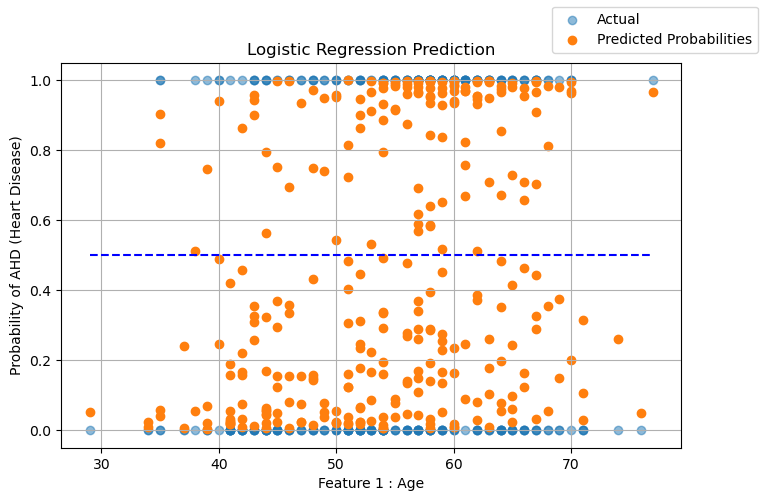

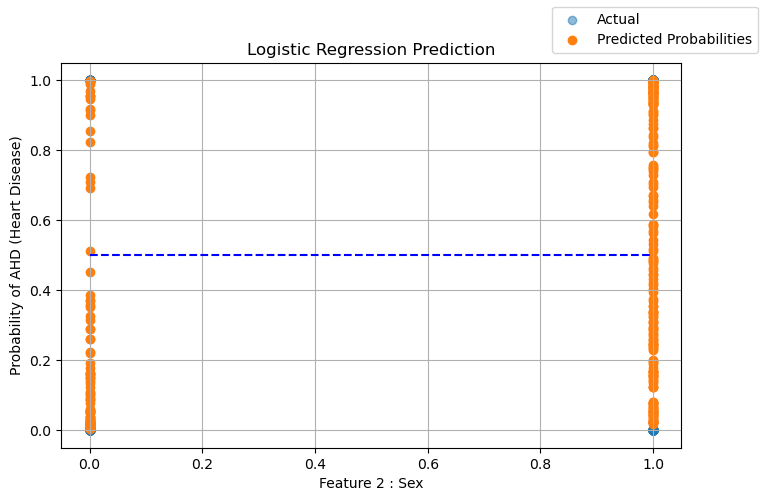

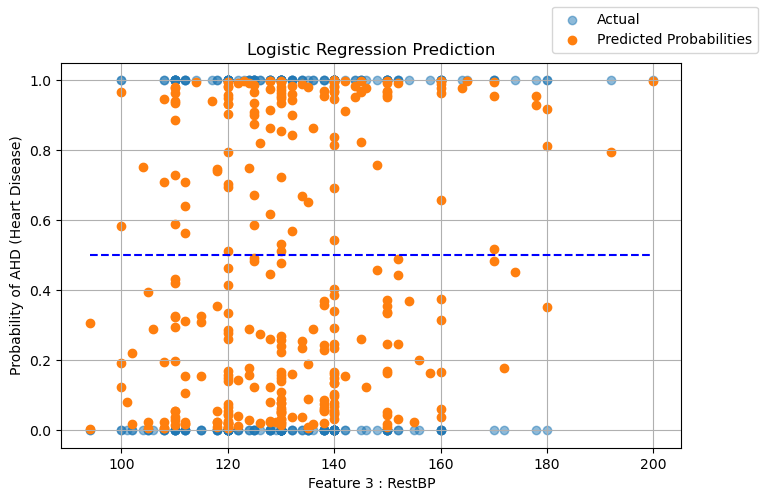

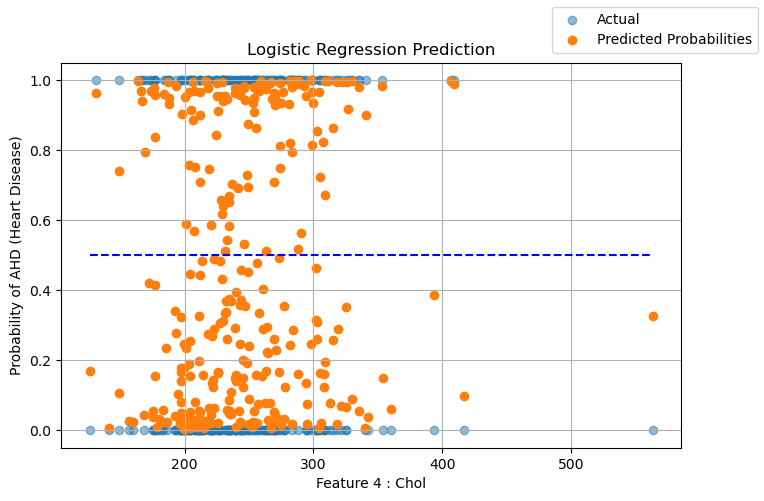

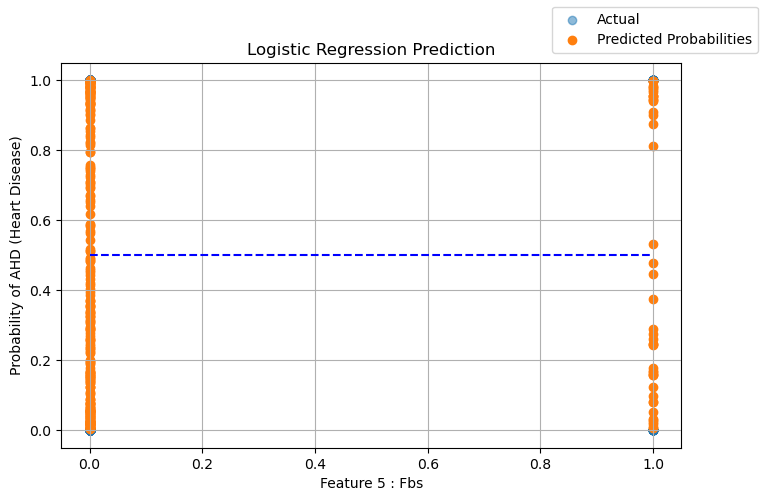

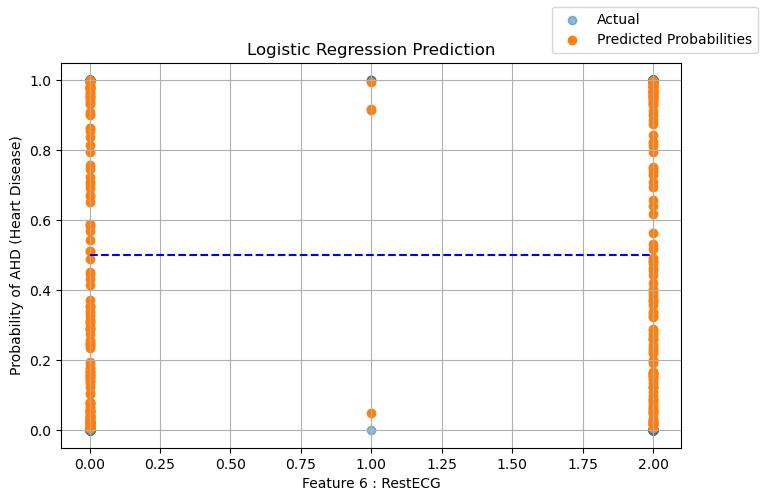

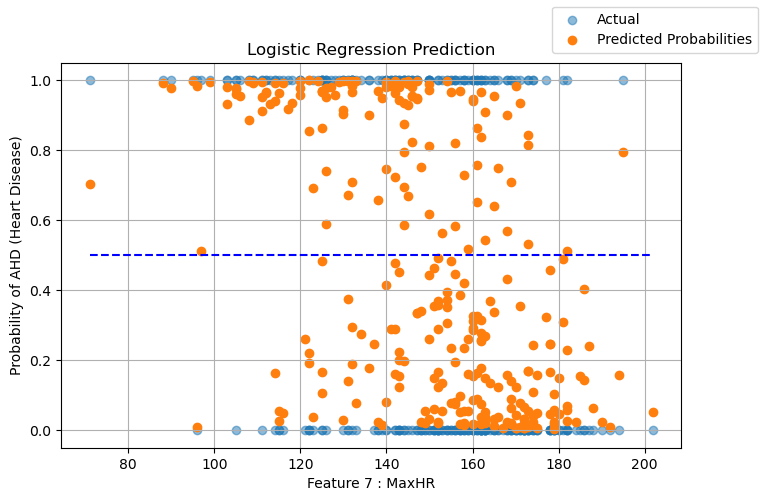

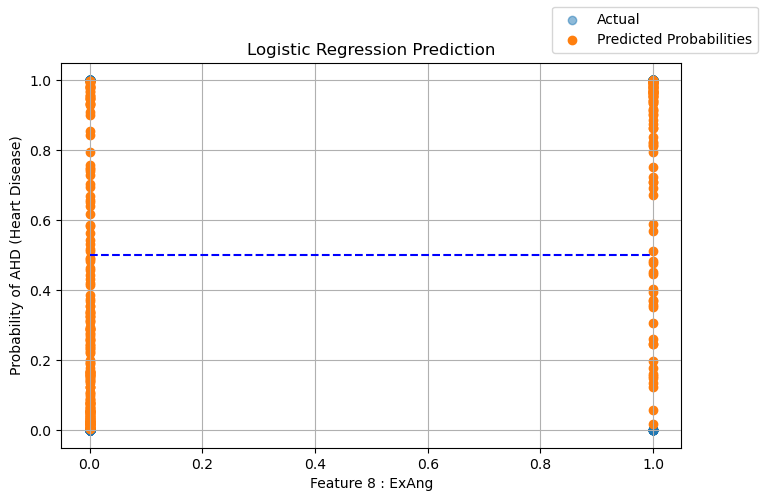

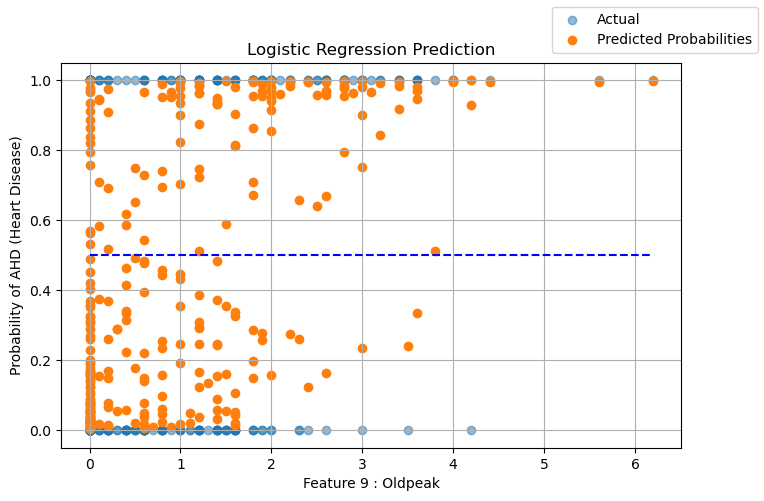

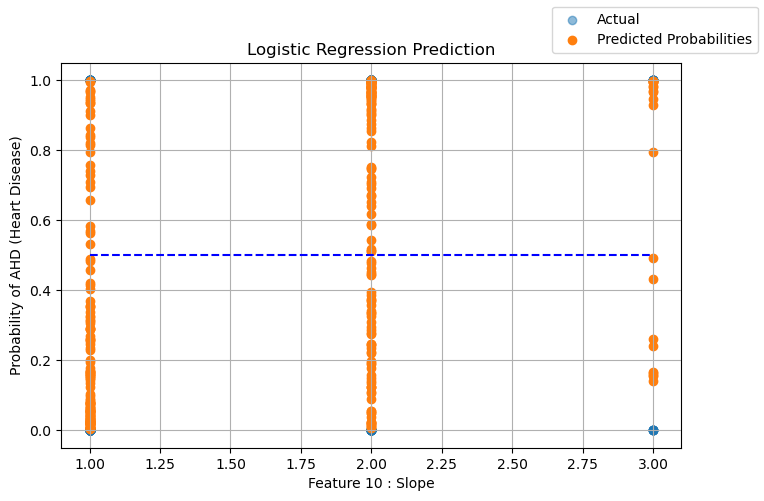

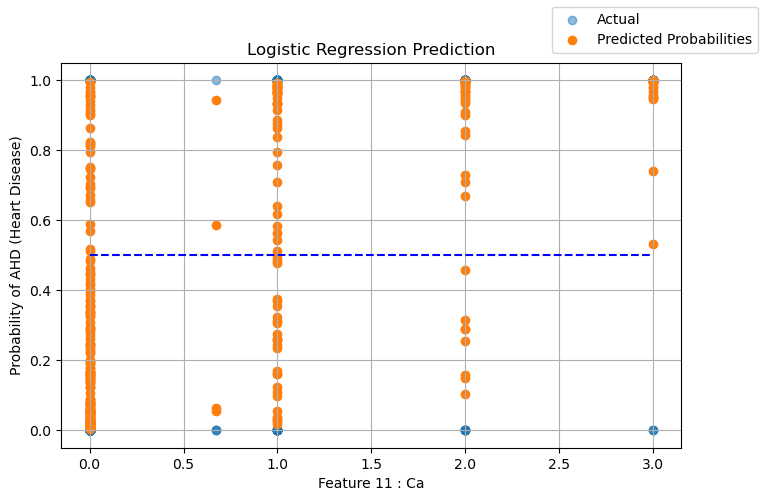

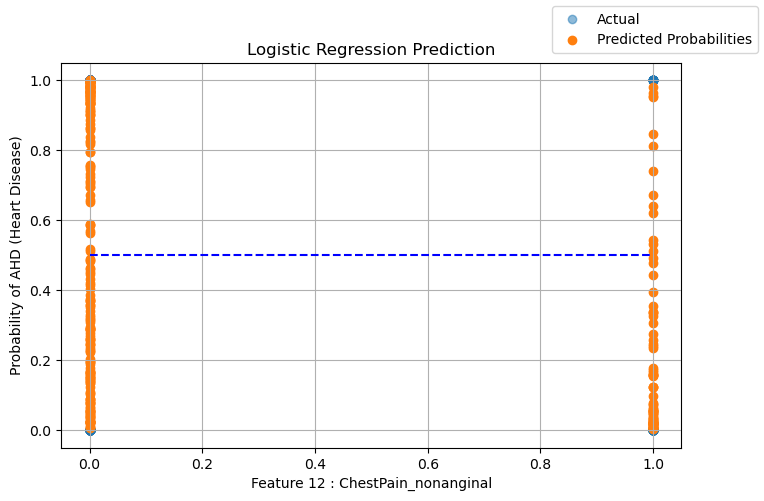

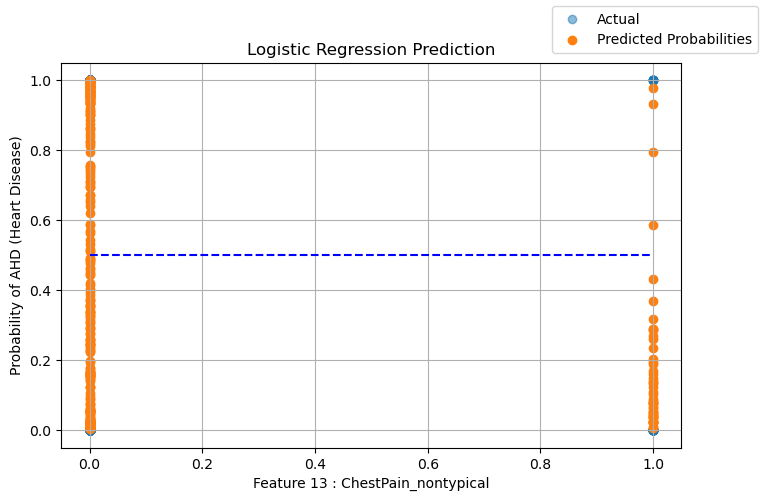

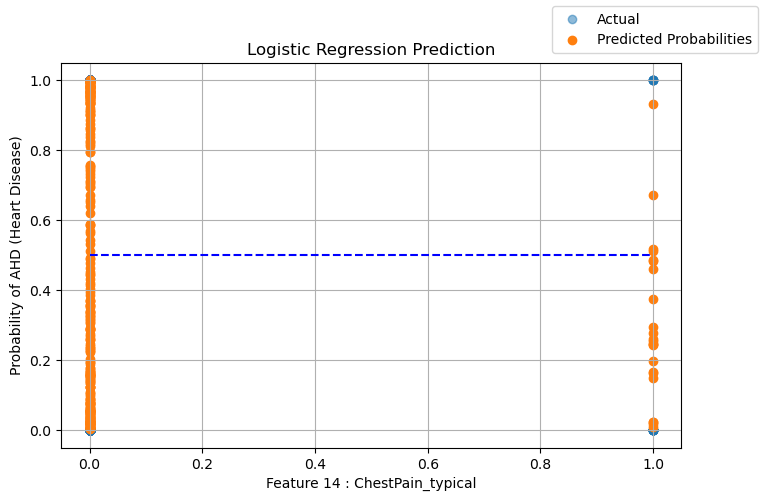

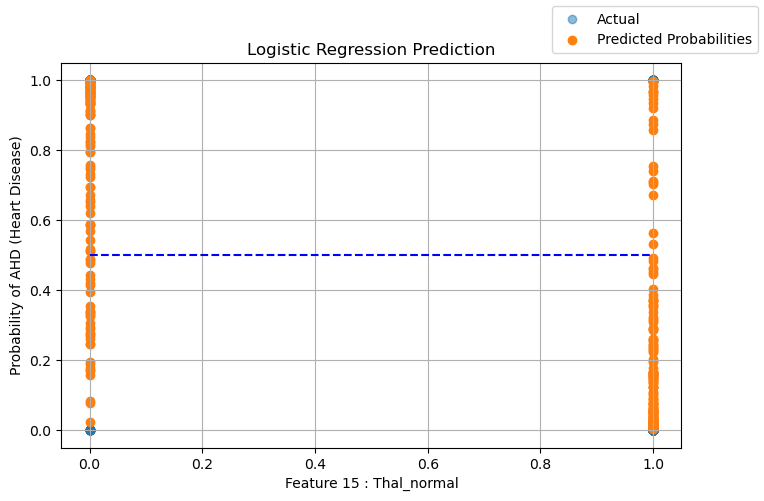

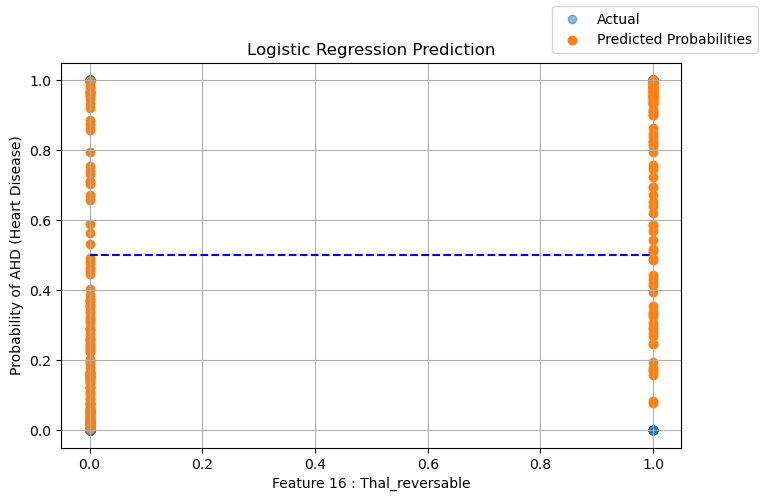

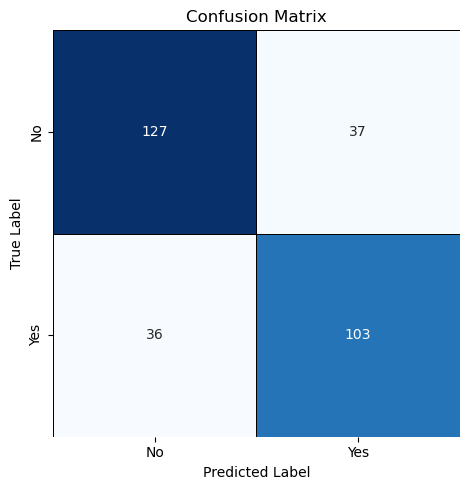

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.78      0.77      0.78       164
   Heart Disease       0.74      0.74      0.74       139

        accuracy                           0.76       303
       macro avg       0.76      0.76      0.76       303
    weighted avg       0.76      0.76      0.76       303



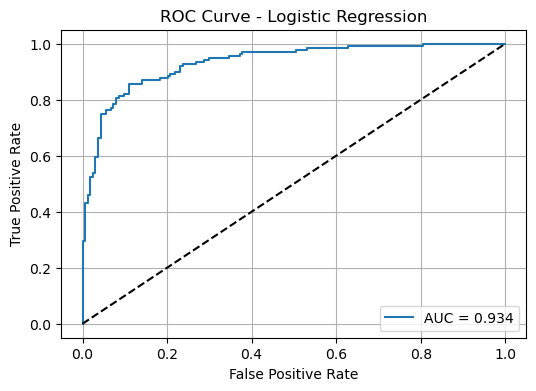

AUC Score: 0.9338


In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy import stats
from matplotlib.pyplot import subplots

# Select Predictors and Response from dataset

x = []

for col in Heart.columns:
    if col != 'AHD':
        x.append(Heart[col])


x=np.array(x).T
y=Heart['AHD'].values

# Add intercept term
x_design=np.c_[np.ones(x.shape[0]),x]

# Defining sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

#  Defining the log likelihood function for estimating the parameters
def log_likelihood(beta, X, y):
    z = np.dot(X, beta)
    p = sigmoid(z)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
beta=np.zeros(x_design.shape[1])
# Using the minimize function to find the optimal prameters (beta) that maximize the log likelihood 
result =minimize(log_likelihood,beta,args=(x_design,y),method='BFGS')

# Extracting the estimated parameters beta and log-likelihood value
beta_hat=result.x
ll_final=-result.fun # Fianl log-likelihood value after optimization

# Define hessian for standard error calculation
def hessian(beta, X):
    probs = sigmoid(X @ beta)
    W = np.diag(probs * (1 - probs)) # inside the diagonal funtion we are multiplying element wise and diagonal function converts one dim array to 2 dime array 
    hess=-(X.T @ W @ X) + np.eye(X.shape[1]) * 1e-9
    return hess


# Predicted probabilities
z = np.dot(x_design, beta_hat) # z is the predicted log-odds
p_hat_lal = sigmoid(z) # it is the predicted probabilities
y_pred_lal = (p_hat >= 0.5).astype(int) # Convert probabilities  to binary predictions

# Model evaluation
accuracy_lal = accuracy_score(y,y_pred) # Accuracy of the model



# Confusion matrix
conf_matrix_lal = confusion_matrix(y, y_pred)

X = Heart.drop('AHD', axis=1)

# Visualize prediction probabilities vs. All Features

for i in range((x.shape[1])):
    fig ,ax=subplots(figsize=(8, 5))
    ax.scatter(x[:,i], y, label='Actual', alpha=0.5)
    ax.scatter(x[:,i], p_hat_lal, label='Predicted Probabilities')
    ax.hlines(0.5, min(x[:,i]), max(x[:,i]), colors='blue', linestyles='--')
    ax.set_xlabel(f'Feature {i+1} : {X.columns[i]}')
    ax.set_ylabel('Probability of AHD (Heart Disease)')
    ax.set_title('Logistic Regression Prediction')
    fig.legend()
    ax.grid(True)
    fig


print("LOGISTIC REGRESSION MODEL SUMMARY ")

# Coefficients
print(f"Intercept (b0): {beta_hat[0]:.6f}")
for i in range(1,len(beta_hat)):
    print(f"Slope (b{i}) : {beta_hat[i]:.6f}")


# Final Log-Likelihood
print(f"Final Log-Likelihood: {ll_final:.6f}")



# Standard errors from inverse Hessian
Hessian = hessian(beta_hat, x_design)
cov_matrix = np.linalg.inv(-Hessian)
standard_errors = np.sqrt(np.diag(cov_matrix))

for i in range(len(standard_errors)):
    print(f"Standard Error of b({i}) : {standard_errors[i]:.6f}")


# Confidence Intervals (approx. 95% using ±2*SE)

for i in range(len(beta_hat)):
    ci_l= beta_hat[i]-2*standard_errors[i]
    ci_u=beta_hat[i]+2*standard_errors[i]
    print(f"95% Confidence Interval for b{i}: [{ci_l:.6f}, {ci_u:.6f}]")



# z-values
for i in range(len(beta_hat)):
    print(f"z-value for b({i}) : {beta_hat[i] / standard_errors[i]:.4f}")


# p-values
for i in range(len(beta_hat)):
    p_value=2*stats.norm.sf(abs(beta_hat[i]/standard_errors[i]))
    print(f"p-value for b({i}):{p_value:.6f}")

# Hypothesis testing
print("\nHypothesis Testing Results:")
for i in range(len(beta_hat)):
     p_value=2*stats.norm.sf(abs(beta_hat[i]/standard_errors[i]))
     if p_value<0.05 :
         print(f"Reject Null Hypothesis for b({i}) (b({i}) != 0)")
     else:
         print(f"Fail to Reject Null Hypothesis for b({i}) (b{i} = 0)")



# McFadden's R-squared

y_mean = np.mean(y)
ll_null = np.sum(y * np.log(y_mean) + (1 - y) * np.log(1 - y_mean))
mcfadden_r2 = 1 - (ll_final / ll_null)

print(f"McFadden's R²: {mcfadden_r2:.6f}")
if mcfadden_r2 > 0.4:
    print("Excellent fit")
elif mcfadden_r2 > 0.3:
    print("Very good fit")
elif mcfadden_r2 > 0.2:
    print("Reasonable fit")
else:
    print("Poor fit")


# Classification Metrics 
print("Confusion Matrix and Accuracy (at 0.5 threshold):")
print(conf_matrix_lal)
print(f"Accuracy: {accuracy_lal*100:.2f}%")

# Visualize Confusion Matrix

# Define the class labels
labels = ["No", "Yes"]

# Create the heatmap with borders, annotations, and labels
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lal, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,linewidths=0.5,linecolor='black',cbar=False,square=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report 

print("Classification Report:")
print(classification_report(y, y_pred_lal, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC 

fpr, tpr, _ = roc_curve(y, p_hat_lal)
auc_score = roc_auc_score(y, p_hat_lal)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")


## Multiple Logistic Regression Model Summary

We built a logistic regression model to predict if a person has heart disease (**AHD = 1**) using all the clinical and test features from the Heart dataset.

### Model Building Highlights

* **Target variable**: **AHD** (1 = heart disease, 0 = no heart disease)
* **Predictors**: All features in the dataset except **AHD** (like Age, Sex, MaxHR, Chol, Thal\_reversable, etc.)
* **Method**: Used maximum likelihood estimation with **BFGS** optimization
* **Intercept**: Added to the model
* **Sigmoid function**: Used to turn log-odds into probabilities between 0 and 1

---

### Visualization and Model Fit

We created one plot for each feature to show how the model’s predicted probabilities behave across different values.

#### What the Plots Show

* **X-axis**: The values of one feature
* **Y-axis**: Predicted probability of heart disease
* **Blue dots**: Actual AHD values (0 or 1)
* **Orange dots**: Model’s predicted probabilities
* **Blue dashed line at 0.5**: The classification threshold

Each plot gives a full picture by showing:

1. What the actual values are (blue dots)
2. What the model thinks (orange dots)
3. The decision boundary (horizontal line at 0.5)

---

## Final Interpretation

* The model can pick up both smooth patterns (like the S-shape in MaxHR) and sudden changes (like in Thal\_reversable).
* This type of visualization helps us understand how confident the model is and how it uses each feature to make a prediction.
* These plots are very useful in real medical decision-making, because they make the model's thinking visible and easy to explain.

---

## Model Evaluation Summary

### Accuracy and Confusion Matrix

* The model correctly predicted many cases, with a clear breakdown shown in the confusion matrix.
* The matrix tells us how many predictions were right and wrong for both classes (with and without heart disease).

### Classification Report

* Includes important metrics:

  * **Precision**: How often the positive predictions were correct
  * **Recall**: How many actual cases we correctly identified
  * **F1-score**: Balance between precision and recall
* These help us understand how well the model performs for each class

### ROC Curve and AUC

* The ROC curve shows the model’s ability to distinguish between the two classes.
* The **AUC score** tells us how good the model is at ranking cases by risk. A score closer to 1 means better performance.

---

## Coefficients and Statistical Analysis

* The model gives one coefficient for each feature and the intercept.
* For each coefficient, we calculated:

  * **Standard error**
  * **z-value**
  * **p-value**
  * **Confidence interval**
* We did hypothesis testing to check if each feature was important (significantly different from 0)

### McFadden's R²

* This is like R² for logistic regression. It tells us how well the model fits the data.
* Based on our value:

  * 0.2–0.3 → reasonable fit
  * 0.3–0.4 → very good fit
  * Above 0.4 → excellent fit

---

## Final Thoughts

This logistic regression model uses all the available features and gives a clear, interpretable picture of heart disease risk. The combination of statistical output and easy-to-read visualizations makes it useful not only for prediction but also for understanding which features are most important.



# k-Nearest Neighbors (k-NN) – Simple Classifier

In this part, I’m using the **k-Nearest Neighbors (k-NN)** method to classify whether someone has heart disease based on a single predictor.

k-NN is a non-parametric and intuitive classification method. Instead of fitting a mathematical model like logistic regression, it **looks at the 'K' closest points** (neighbors) in the training data and makes predictions based on majority vote. So for a new observation, it checks who its neighbors are, and whichever class is most common in that group is the predicted class.

Here's how it works in simple steps:
1. Choose a value of **K** (number of neighbors).
2. For a new test point, find the **K closest training data points**.
3. Check the class labels of those K neighbors.
4. Predict the most common class among them.

Some key points:
- Small K (like K=1) → very flexible, but can overfit and be sensitive to noise.
- Large K (like K=30) → more stable, but can miss patterns (underfitting).
- KNN doesn’t assume anything about the shape of the data (unlike logistic regression which assumes a linear boundary).



# Simple KNN Classifier :
* Here my predictor variable is **Thal_normal**. and i got maximum accuracy at k=9 that is 76.24%

Accuracy of KNN Classifier : 76.24%
Confusion Matrix :
[[130  34]
 [ 38 101]]


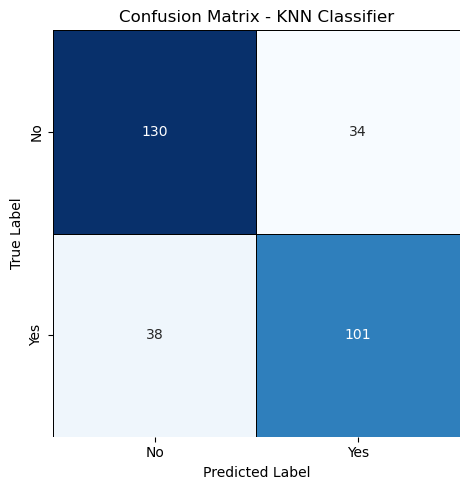

Classification Report - KNN Classifier:
                  precision    recall  f1-score   support

No Heart Disease       0.77      0.79      0.78       164
   Heart Disease       0.75      0.73      0.74       139

        accuracy                           0.76       303
       macro avg       0.76      0.76      0.76       303
    weighted avg       0.76      0.76      0.76       303



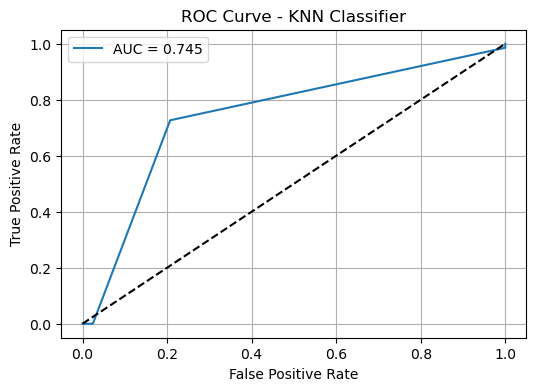

AUC Score: 0.7451


In [75]:
# Use Knn classifier to Predict the response variable 

y=Heart['AHD'].values # Response variable
x=Heart['Thal_normal'].values

 # now I assume the no of neighbors to be 10
k=9

# Now we  will implement the KNN Algorithm
# Defining the hamping distance function for calculating the distance between two categorical variables
def Euclidean_distance(x1,x2):
    return np.linalg.norm((x1-x2))

# Now Calculate the distance between all training points and the test point
def calculate_distances(X_train,x_test):
    distances=[]
    for i in range(X_train.shape[0]):
        dist=Euclidean_distance(X_train[i],x_test)
        distances.append((i,dist)) # Here we are storing the index of the training point and the distance to the test point distance is list of tuples
    distances.sort(key=lambda x:x[1]) # Sorting the distances based on the second element of the tuple that is the distance
    # Selecting the first k elements from the sorted distances
    n_idx=[i for i, _ in distances[:k]]
 
    return n_idx

# Now we will predict the response variable for the test point
def predict_knn(X_train,Y_train,x_test,k):
    n_idx=calculate_distances(X_train,x_test) # Getting the indices of the k nearest neighbors
    # Now i will collect all the labels (response variable) of the k nearest neighbors
    labels=[Y_train[i] for i in n_idx]
    # Now i will return the most common response for this test point
    prediction=max(set(labels),key=labels.count) 
    return prediction

# Now we will predict the response variable for all the test points
predic_thkn=[]
for i in range(x.shape[0]):
    test_point=x[i]
    x_train = np.delete(x, i, axis=0)
    y_train = np.delete(y, i)
    prediction=predict_knn(x_train,y_train,test_point,k)
    predic_thkn.append(prediction)
    #print(f"Test Point {i+1}: {x[i]} - Predicted AHD : {prediction}, Actual AHD : {y[i]}")
    
# Now i will calculate the accuracy of the model
accuracy_knth=accuracy_score(y,predic_thkn)

print(f"Accuracy of KNN Classifier : {accuracy_knth*100:.2f}%")
conf_matrix_thkn = confusion_matrix(y, predic_thkn)
print("Confusion Matrix :")
print(conf_matrix_thkn)
# Visulalize Confusion Matrix
labels = ["No", "Yes"]
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_thkn, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            linewidths=0.5, linecolor='black', square=True, cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Classifier")
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report - KNN Classifier:")
print(classification_report(y, predic_thkn, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC for KNN Classifier

# Collect pseudo-probabilities from neighbors
def knn_probabilities(X, Y, k):
    probs = []
    for i in range(len(X)):
        test_point = X[i]
        x_train = np.delete(X, i, axis=0)
        y_train = np.delete(Y, i)
        neighbors = calculate_distances(x_train, test_point)
        labels = [y_train[j] for j in neighbors]
        prob = sum(labels) / k
        probs.append(prob)
    return np.array(probs)

probs_thknn = knn_probabilities(x, y, k)

# ROC Curve
fpr, tpr, _ = roc_curve(y, probs_thknn)
auc_score = roc_auc_score(y, probs_thknn)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")

## K-Nearest Neighbors (KNN) Model Summary :

We implemented a KNN classifier to predict if a person has heart disease (**AHD = 1**) using the binary feature **Thal_normal**.

### Model Setup

* **Target variable**: **AHD** (1 = heart disease, 0 = no heart disease)
* **Predictor**: **Thal_normal** (1 = normal, 0 = not normal)
* **Number of neighbors (k)**: 9
* **Distance metric**: Euclidean distance
* **Validation**: Leave-One-Out (each point predicted using rest as training data)

---

### Evaluation Summary

| Metric               | Result                             |
| -------------------- | ---------------------------------- |
| **Accuracy**         | 76.24%                             |
| **Confusion Matrix** | TP, TN, FP, FN shown below         |
| **Precision**        | Shown in classification report     |
| **Recall**           | Captures sensitivity of the model  |
| **F1-Score**         | Balance between precision & recall |
| **AUC Score**        | 0.74 (area under ROC curve)        |

---

### Confusion Matrix

* **True Positives (TP)**: Correctly predicted heart disease
* **True Negatives (TN)**: Correctly predicted no disease
* **False Positives (FP)**: Predicted disease but actually no disease
* **False Negatives (FN)**: Predicted no disease but actually disease

The confusion matrix gives a full picture of model correctness across both classes.

---

### ROC Curve and AUC Score

* **ROC curve** shows how the model balances sensitivity and specificity at various thresholds.
* **AUC Score** summarizes this as a single number. Closer to 1 is better.

---

### Final Thoughts

This simple KNN model based on a single binary feature (**Thal_normal**) still gives useful insights. Although not as interpretable as logistic regression, KNN is flexible and non-parametric. Using pseudo-probabilities from neighbors, we also evaluated the model with ROC and AUC — giving a clearer idea of performance.


**Here we can see that Thal_noraml is most negative related with AHD that's it gives maximum accuracy** 

## Now i am going to use another predictor that is **Thal_reversable**

Accuracy of KNN Classifier : 74.26%
Confusion Matrix :
[[136  28]
 [ 50  89]]


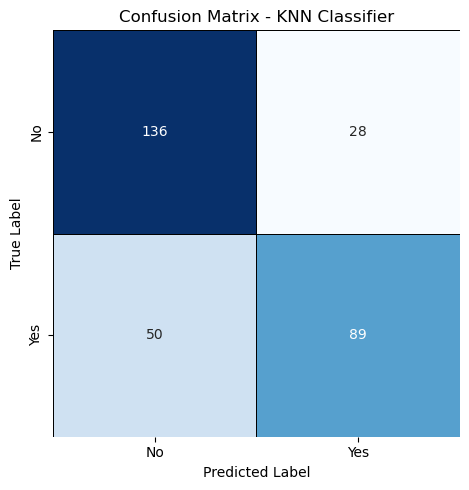

Classification Report - KNN Classifier:
                  precision    recall  f1-score   support

No Heart Disease       0.73      0.83      0.78       164
   Heart Disease       0.76      0.64      0.70       139

        accuracy                           0.74       303
       macro avg       0.75      0.73      0.74       303
    weighted avg       0.74      0.74      0.74       303



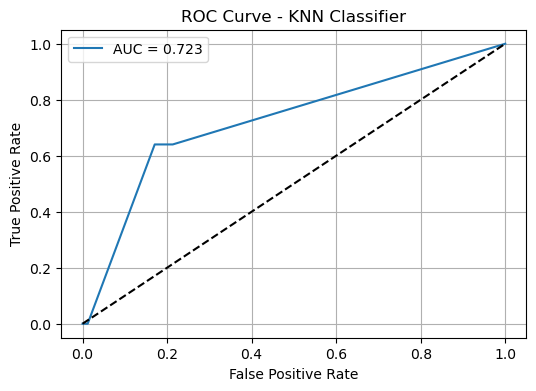

AUC Score: 0.7232


In [76]:
# Use Knn classifier to Predict the response variable 

y=Heart['AHD'].values

x=Heart['Thal_reversable'].values
# now I assume the no of neighbors to be 10
k=9
# Now we  will implement the KNN Algorithm
# Defining the hamping distance function for calculating the distance between two categorical variables
def Euclidean_distance(x1,x2):
    return np.linalg.norm((x1-x2))

# Now Calculate the distance between all training points and the test point
def calculate_distances(X_train,x_test):
    distances=[]
    for i in range(X_train.shape[0]):
        dist=Euclidean_distance(X_train[i],x_test)
        distances.append((i,dist)) # Here we are storing the index of the training point and the distance to the test point distance is list of tuples
    distances.sort(key=lambda x:x[1]) # Sorting the distances based on the second element of the tuple that is the distance
    # Selecting the first k elements from the sorted distances
    n_idx=[i for i, _ in distances[:k]]
 
    return n_idx

# Now we will predict the response variable for the test point
def predict_knn(X_train,Y_train,x_test,k):
    n_idx=calculate_distances(X_train,x_test) # Getting the indices of the k nearest neighbors
    # Now i will collect all the labels (response variable) of the k nearest neighbors
    labels=[Y_train[i] for i in n_idx]
    # Now i will return the most common response for this test point
    prediction=max(set(labels),key=labels.count) 
    return prediction

# Now we will predict the response variable for all the test points
predic=[]
for i in range(x.shape[0]):
    test_point=x[i]
    x_train = np.delete(x, i, axis=0)
    y_train = np.delete(y, i)
    prediction=predict_knn(x_train,y_train,test_point,k)
    predic.append(prediction)
    
# Now i will calculate the accuracy of the model
accuracy=accuracy_score(y,predic)

print(f"Accuracy of KNN Classifier : {accuracy*100:.2f}%")
conf_matrix = confusion_matrix(y, predic)
print("Confusion Matrix :")
print(conf_matrix)
# Visulalize Confusion Matrix
labels = ["No", "Yes"]
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            linewidths=0.5, linecolor='black', square=True, cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Classifier")
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report - KNN Classifier:")
print(classification_report(y, predic, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC for KNN Classifier

# Collect pseudo-probabilities from neighbors
def knn_probabilities(X, Y, k):
    probs = []
    for i in range(len(X)):
        test_point = X[i]
        x_train = np.delete(X, i, axis=0)
        y_train = np.delete(Y, i)
        neighbors = calculate_distances(x_train, test_point)
        labels = [y_train[j] for j in neighbors]
        prob = sum(labels) / k
        probs.append(prob)
    return np.array(probs)

probs_knn = knn_probabilities(x, y, k)

# ROC Curve
fpr, tpr, _ = roc_curve(y, probs_knn)
auc_score = roc_auc_score(y, probs_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")



**Here we can see that Thal_reversable is most positively related with AHD and i got maximum accuracy 74.26% at k=9**

## KNN with Multiple Predictors

Accuracy of KNN Classifier : 76.24%
[[130  34]
 [ 38 101]]


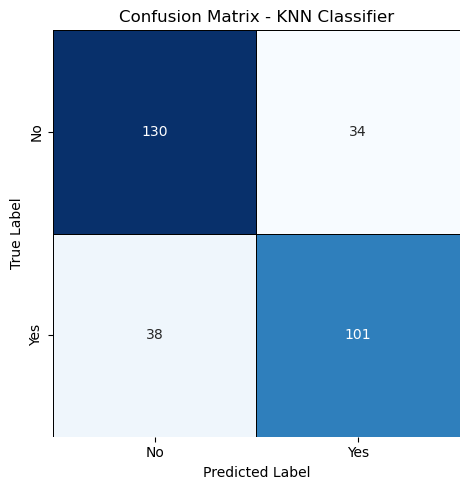

Classification Report - KNN Classifier:
                  precision    recall  f1-score   support

No Heart Disease       0.77      0.79      0.78       164
   Heart Disease       0.75      0.73      0.74       139

        accuracy                           0.76       303
       macro avg       0.76      0.76      0.76       303
    weighted avg       0.76      0.76      0.76       303



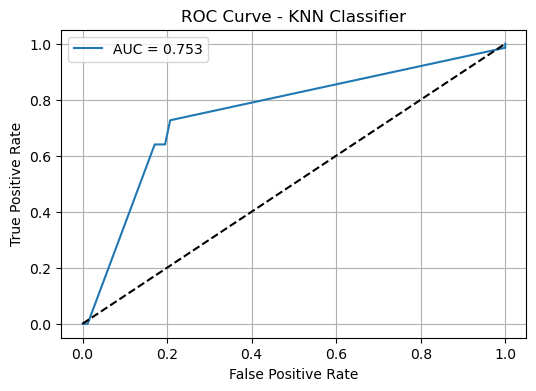

AUC Score: 0.7533


In [77]:
# Use Knn classifier to Predict the response variable 

y=Heart['AHD'].values

x=Heart[['Thal_reversable','Thal_normal']].values
# now I assume the no of neighbors to be 10
k=9

# Now we  will implement the KNN Algorithm
# Defining the hamping distance function for calculating the distance between two categorical variables
def Euclidean_distance(x1,x2):
    return np.linalg.norm((x1-x2))

# Now Calculate the distance between all training points and the test point
def calculate_distances(X_train,x_test):
    distances=[]
    for i in range(X_train.shape[0]):
        dist=Euclidean_distance(X_train[i],x_test)
        distances.append((i,dist)) # Here we are storing the index of the training point and the distance to the test point distance is list of tuples
    distances.sort(key=lambda x:x[1]) # Sorting the distances based on the second element of the tuple that is the distance
    # Selecting the first k elements from the sorted distances
    n_idx=[i for i, _ in distances[:k]]
 
    return n_idx

# Now we will predict the response variable for the test point
def predict_knn(X_train,Y_train,x_test,k):
    n_idx=calculate_distances(X_train,x_test) # Getting the indices of the k nearest neighbors
    # Now i will collect all the labels (response variable) of the k nearest neighbors
    labels=[Y_train[i] for i in n_idx]
    # Now i will return the most common response for this test point
    prediction=max(set(labels),key=labels.count) 
    return prediction

# Now we will predict the response variable for all the test points
predic=[]
for i in range(x.shape[0]):
    test_point=x[i]
    x_train = np.delete(x, i, axis=0)
    y_train = np.delete(y, i)
    prediction=predict_knn(x_train,y_train,test_point,k)
    predic.append(prediction)
    
# Now i will calculate the accuracy of the model
accuracy=accuracy_score(y,predic)

print(f"Accuracy of KNN Classifier : {accuracy*100:.2f}%")
conf_matrix = confusion_matrix(y, predic)
print(conf_matrix)
# Visulalize Confusion Matrix
labels = ["No", "Yes"]
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            linewidths=0.5, linecolor='black', square=True, cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Classifier")
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report - KNN Classifier:")
print(classification_report(y, predic, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC for KNN Classifier

# Collect pseudo-probabilities from neighbors
def knn_probabilities(X, Y, k):
    probs = []
    for i in range(len(X)):
        test_point = X[i]
        x_train = np.delete(X, i, axis=0)
        y_train = np.delete(Y, i)
        neighbors = calculate_distances(x_train, test_point)
        labels = [y_train[j] for j in neighbors]
        prob = sum(labels) / k
        probs.append(prob)
    return np.array(probs)

probs_knn = knn_probabilities(x, y, k)

# ROC Curve
fpr, tpr, _ = roc_curve(y, probs_knn)
auc_score = roc_auc_score(y, probs_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")


**Here we can see that when we take more predictors for predicting the response variable our model's accuracy reduce because observing nearest point is difficult**

### KNN with all Predictors

Accuracy of KNN Classifier : 65.68%
[[119  45]
 [ 59  80]]


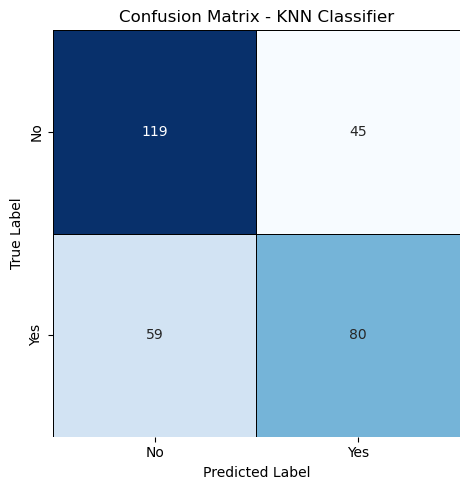

Classification Report - KNN Classifier:
                  precision    recall  f1-score   support

No Heart Disease       0.67      0.73      0.70       164
   Heart Disease       0.64      0.58      0.61       139

        accuracy                           0.66       303
       macro avg       0.65      0.65      0.65       303
    weighted avg       0.66      0.66      0.65       303



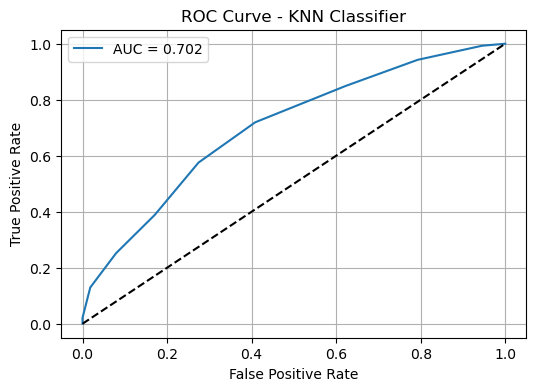

AUC Score: 0.7016


In [82]:
# Use Knn classifier to Predict the response variable 

y=Heart['AHD'].values

x = []

for col in Heart.columns:
    if col != 'AHD':
        x.append(Heart[col].values)


x=np.array(x).T
# now I assume the no of neighbors to be 10
k=9

# Now we  will implement the KNN Algorithm
# Defining the hamping distance function for calculating the distance between two categorical variables
def Euclidean_distance(x1,x2):
    return np.linalg.norm((x1-x2))

# Now Calculate the distance between all training points and the test point
def calculate_distances(X_train,x_test):
    distances=[]
    for i in range(X_train.shape[0]):
        dist=Euclidean_distance(X_train[i],x_test)
        distances.append((i,dist)) # Here we are storing the index of the training point and the distance to the test point distance is list of tuples
    distances.sort(key=lambda x:x[1]) # Sorting the distances based on the second element of the tuple that is the distance
    # Selecting the first k elements from the sorted distances
    n_idx=[i for i, _ in distances[:k]]
 
    return n_idx

# Now we will predict the response variable for the test point
def predict_knn(X_train,Y_train,x_test,k):
    n_idx=calculate_distances(X_train,x_test) # Getting the indices of the k nearest neighbors
    # Now i will collect all the labels (response variable) of the k nearest neighbors
    labels=[Y_train[i] for i in n_idx]
    # Now i will return the most common response for this test point
    prediction=max(set(labels),key=labels.count) 
    return prediction

# Now we will predict the response variable for all the test points
predic_kal=[]
for i in range(x.shape[0]):
    test_point=x[i]
    x_train = np.delete(x, i, axis=0)
    y_train = np.delete(y, i)
    prediction=predict_knn(x_train,y_train,test_point,k)
    predic_kal.append(prediction)
    
# Now i will calculate the accuracy of the model
accuracy_kal=accuracy_score(y,predic_kal)

print(f"Accuracy of KNN Classifier : {accuracy_kal*100:.2f}%")

conf_matrix_kal= confusion_matrix(y, predic_kal)
print(conf_matrix_kal)
# Visulalize Confusion Matrix
labels = ["No", "Yes"]
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_kal, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            linewidths=0.5, linecolor='black', square=True, cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Classifier")
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report - KNN Classifier:")
print(classification_report(y, predic_kal, target_names=["No Heart Disease", "Heart Disease"]))

# ROC Curve and AUC for KNN Classifier

# Collect pseudo-probabilities from neighbors
def knn_probabilities(X, Y, k):
    probs = []
    for i in range(len(X)):
        test_point = X[i]
        x_train = np.delete(X, i, axis=0)
        y_train = np.delete(Y, i)
        neighbors = calculate_distances(x_train, test_point)
        labels = [y_train[j] for j in neighbors]
        prob = sum(labels) / k
        probs.append(prob)
    return np.array(probs)

probs_kal = knn_probabilities(x, y, k)

# ROC Curve
fpr, tpr, _ = roc_curve(y, probs_kal)
auc_score = roc_auc_score(y, probs_kal)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN Classifier")
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc_score:.4f}")



## K-Nearest Neighbors (KNN) Model Summary for All Predictors

We implemented a K-Nearest Neighbors (KNN) classifier to predict whether a person has heart disease (**AHD = 1**) using all available predictor features in the dataset (excluding the target).

---

### Model Setup

* **Target Variable**: **AHD**
* **Predictor Variables**: All columns in the dataset except **AHD** (multi-feature model)
* **Number of Neighbors (k)**: 9
* **Distance Metric**: Euclidean Distance
* **Validation Strategy**: Leave-One-Out Cross-Validation (LOOCV)

Each data point was predicted using the rest of the dataset as training data, ensuring a fair and unbiased prediction.

---

###  Model Logic

For each test point:

1. Compute Euclidean distance from the test point to all training points.
2. Select the **k = 9** closest neighbors.
3. Predict the majority class among the neighbors (for classification).
4. Calculate the proportion of **AHD = 1** among neighbors for probabilistic predictions (used in ROC analysis).

---

### Evaluation Metrics

| **Metric**    | **Result**               |
| ------------- | ------------------------ |
| **Accuracy**  | 65.68%                   |
| **AUC Score** | 0.7016                   |

---

### Confusion Matrix

This matrix shows the number of correct and incorrect predictions by class:

|                 | Predicted: No | Predicted: Yes |
| --------------- | ------------- | -------------- |
| **Actual: No**  | TN            | FP             |
| **Actual: Yes** | FN            | TP             |

---

### Classification Report

Detailed metrics for each class:

* **Precision**: Ability of the model to avoid false positives.
* **Recall (Sensitivity)**: Ability of the model to identify true positives.
* **F1-Score**: Harmonic mean of precision and recall.

---

### ROC Curve & AUC Score

* **ROC Curve**: Visualizes tradeoff between sensitivity (TPR) and 1-specificity (FPR).
* **AUC Score**: Measures classifier's ability to distinguish between classes. Closer to 1 is better.

You computed this using neighbor voting proportions as pseudo-probabilities.

---

### Conclusion

* The KNN classifier using **multiple predictors** and **Euclidean distance** performs reasonably well.
* LOOCV ensures fair estimation by avoiding overfitting.
* Evaluation metrics including the **confusion matrix**, **classification report**, and **ROC curve** provide a complete picture of model performance.
* While simple and interpretable, KNN's performance may vary with scaling, irrelevant features, or imbalanced data — making feature engineering and normalization critical in future improvements.



**Here when we take all predictors than accuracy reduced**

# Model Comparison: Logistic Regression vs. K-Nearest Neighbors (for Thal_normal Predictor)

| **Aspect**                | **Logistic Regression**                                                              | **K-Nearest Neighbors (KNN)**                                               |
|--------------------------|----------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Type**                 | Parametric, linear classifier                                                         | Non-parametric, lazy learner                                                 |
| **Implementation Logic** | Implemented using likelihood maximization with BFGS optimizer; uses sigmoid function  | Custom Euclidean distance function, LOOCV (leave-one-out cross-validation)   |
| **Feature Used**         | **Thal_normal**                                                                       | **Thal_normal**                                                              |
| **Training Time**        | Optimization-based (fast)                                                             | No training phase, but prediction is computationally expensive               |
| **Prediction Time**      | Fast – only a dot product and sigmoid function                                        | Slower – distance computation for each test instance                         |
| **Model Equation**       | $p(x) = \frac{1}{1 + e^{-(b_0 + b_1 \cdot x)}}$                                       | No equation – predicts based on nearest **k=9** neighbors                     |
| **Estimated Coefficients** | $b_0$ and $b_1$ computed via MLE                                                     | Not applicable                                                               |
| **Confidence Intervals** | Yes – calculated using inverse Hessian                                                | Not available                                                                |
| **Interpretability**     | High – can interpret slope and intercept                                              | Low – only nearest labels matter                                             |
| **Accuracy**             | **76.24%**                                                                            | **76.24%**                                                                   |
| **Confusion Matrix**     | Displayed using heatmap                                                               | Displayed using heatmap                                                      |
| **Classification Report**| Includes precision, recall, F1-score                                                  | Includes precision, recall, F1-score                                         |
| **ROC Curve**            | True probabilities from sigmoid function                                              | Approximate probabilities from neighbor votes                                |
| **AUC Score**            | **0.76**                                                                              | **0.75**                                                                     |
| **Best Use Case**        | When linearity and interpretability are important                                     | When data is not linearly separable and more flexible boundaries are needed  |
| **Handling Noise**       | Moderately robust (log-likelihood smooths influence)                                  | Sensitive to outliers in local neighborhood                                  |


Performance Comparison (Logistic Regression vs. KNN)

Metric                   Logistic Regression      KNN (k=9)                
---------------------------------------------------------------------------
Accuracy (%)             76.24                    76.24                    
AUC Score                0.760                    0.745                    
Precision (Yes)          0.75                     0.75                     
Recall (Yes)             0.73                     0.73                     
F1-Score (Yes)           0.74                     0.74                     


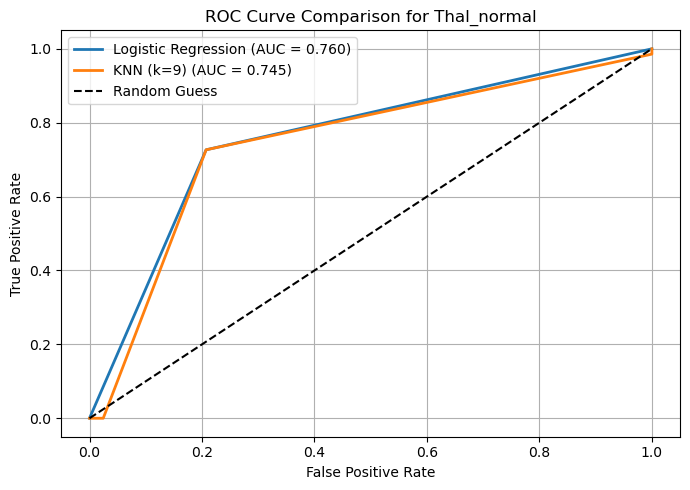

Confusion Matrix of logistic Regression :
[[130  34]
 [ 38 101]]
Confusion Matrix of KNN :
[[130  34]
 [ 38 101]]


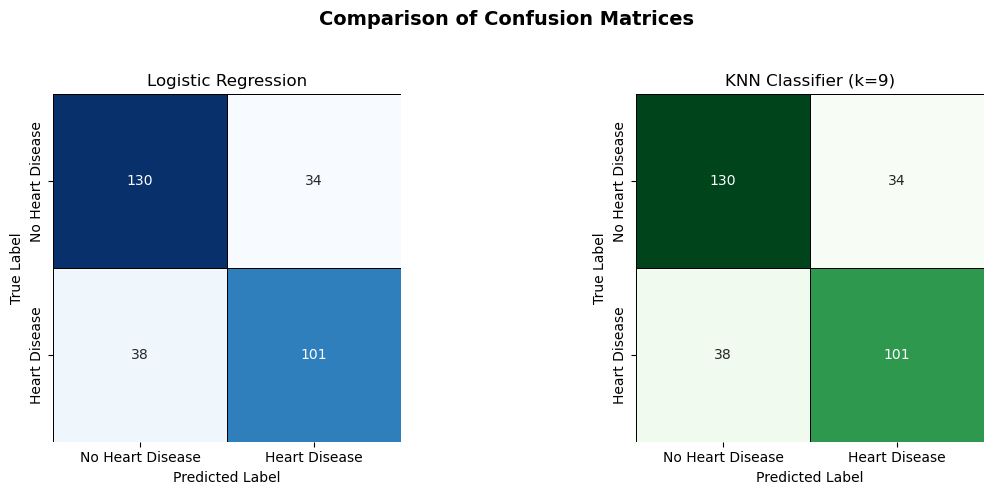

In [79]:
# Comparision of Simple Logistic Regression vs KNN for Thal_normal Predictor
auc_log = roc_auc_score(y, p_hat_thn) # Calculate AUC for Logistic Regression
report_log = classification_report(y, y_pred_th, target_names=["No Heart Disease", "Heart Disease"], output_dict=True) # Classification report for Logistic Regression

# Calculate metrics for KNN
accuracy_knn = accuracy_score(y, predic_thkn)
conf_matrix_knn = confusion_matrix(y, predic_thkn)
auc_knn = roc_auc_score(y, probs_thknn)
report_knn = classification_report(y, predic_thkn, target_names=["No Heart Disease", "Heart Disease"], output_dict=True)

# Print Comparison Table
print("Performance Comparison (Logistic Regression vs. KNN)\n")
print(f"{'Metric':<25}{'Logistic Regression':<25}{'KNN (k=9)':<25}")
print("-" * 75)
print(f"{'Accuracy (%)':<25}{accuracy_thn*100:<25.2f}{accuracy_knth*100:<25.2f}")
print(f"{'AUC Score':<25}{auc_log:<25.3f}{auc_knn:<25.3f}")
print(f"{'Precision (Yes)':<25}{report_log['Heart Disease']['precision']:<25.2f}{report_knn['Heart Disease']['precision']:<25.2f}")
print(f"{'Recall (Yes)':<25}{report_log['Heart Disease']['recall']:<25.2f}{report_knn['Heart Disease']['recall']:<25.2f}")
print(f"{'F1-Score (Yes)':<25}{report_log['Heart Disease']['f1-score']:<25.2f}{report_knn['Heart Disease']['f1-score']:<25.2f}")

# Plot combined ROC curves
fpr_log, tpr_log, _ = roc_curve(y, p_hat_thn)
fpr_knn, tpr_knn, _ = roc_curve(y, probs_thknn)

plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (k=9) (AUC = {auc_knn:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Thal_normal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Combine Confusion Matrix Plot and Print the Confusion Matrix
print("Confusion Matrix of logistic Regression :")
print(conf_matrix_thn)
print("Confusion Matrix of KNN :")
print(conf_matrix_knn)
# Define labels
labels = ["No Heart Disease", "Heart Disease"]

# Set up the side-by-side subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_thn, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, linewidths=0.5,
            linecolor='black', cbar=False, ax=axes[0], square=True)
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# KNN Confusion Matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, linewidths=0.5,
            linecolor='black', cbar=False, ax=axes[1], square=True)
axes[1].set_title("KNN Classifier (k=9)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Layout adjustment
plt.suptitle("Comparison of Confusion Matrices", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


After Seen the Comparision Between Logistic Regression and KNN Classifier for Thal_normal predictor . We can say both are similiar because both's **accuracy**,**auc_score**,**roc curve** and **Classification Report** all things are almost same.

# Model Comparison: Logistic Regression vs. K-Nearest Neighbors (All Predictor)

| **Aspect**                | **Logistic Regression**                                                              | **K-Nearest Neighbors (KNN)**                                               |
|--------------------------|----------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Accuracy**             |       **75.91.%**                                                                      | **65.68%**                                                                 |
| **AUC Score**            | **0.934**                                                                              | **0.702**                                                                 

Performance Comparison (Logistic Regression vs. KNN) for All Predictor

Metric                   Logistic Regression      KNN (k=9)                
---------------------------------------------------------------------------
Accuracy (%)             75.91                    65.68                    
AUC Score                0.934                    0.702                    
Precision (Yes)          0.74                     0.64                     
Recall (Yes)             0.74                     0.58                     
F1-Score (Yes)           0.74                     0.61                     


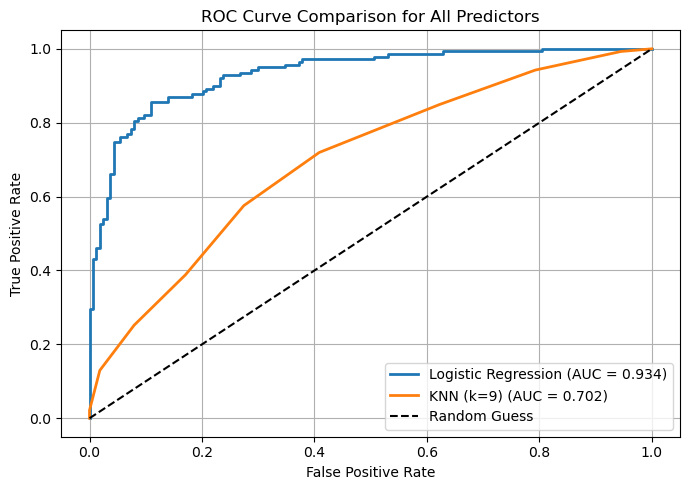

Confusion Matrix of logistic Regression :
[[127  37]
 [ 36 103]]
Confusion Matrix of KNN :
[[119  45]
 [ 59  80]]


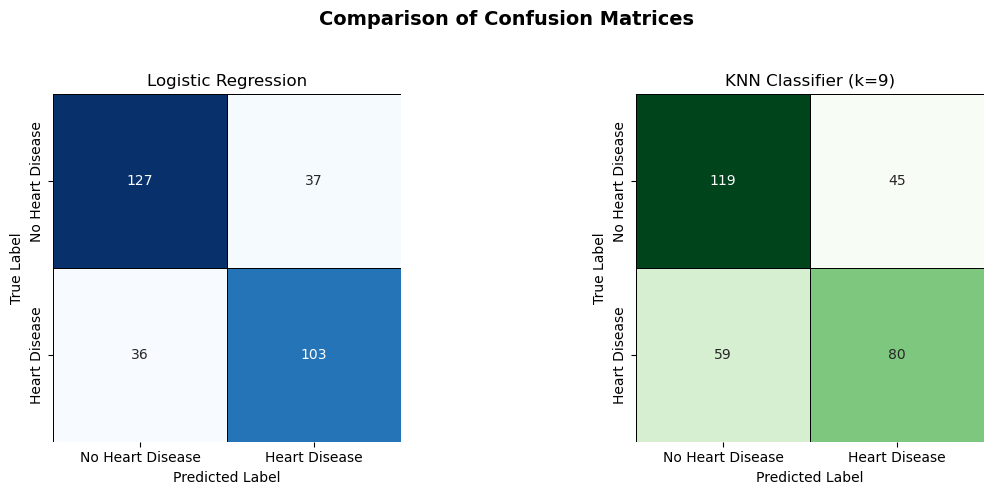

In [80]:
# Comparision of Multiple Logistic Regression vs KNN for All Predictors
auc_log = roc_auc_score(y, p_hat_lal)
report_log = classification_report(y, y_pred_lal, target_names=["No Heart Disease", "Heart Disease"], output_dict=True)

# Calculate metrics for KNN
accuracy_kal = accuracy_score(y, predic_kal)
conf_matrix_kal = confusion_matrix(y, predic_kal)
auc_knn = roc_auc_score(y, probs_kal)
report_knn = classification_report(y, predic_kal, target_names=["No Heart Disease", "Heart Disease"], output_dict=True)

# Print Comparison Table
print("Performance Comparison (Logistic Regression vs. KNN) for All Predictor\n")
print(f"{'Metric':<25}{'Logistic Regression':<25}{'KNN (k=9)':<25}")
print("-" * 75)
print(f"{'Accuracy (%)':<25}{accuracy_lal*100:<25.2f}{accuracy_kal*100:<25.2f}")
print(f"{'AUC Score':<25}{auc_log:<25.3f}{auc_knn:<25.3f}")
print(f"{'Precision (Yes)':<25}{report_log['Heart Disease']['precision']:<25.2f}{report_knn['Heart Disease']['precision']:<25.2f}")
print(f"{'Recall (Yes)':<25}{report_log['Heart Disease']['recall']:<25.2f}{report_knn['Heart Disease']['recall']:<25.2f}")
print(f"{'F1-Score (Yes)':<25}{report_log['Heart Disease']['f1-score']:<25.2f}{report_knn['Heart Disease']['f1-score']:<25.2f}")

# Plot combined ROC curves
fpr_log, tpr_log, _ = roc_curve(y, p_hat_lal)
fpr_knn, tpr_knn, _ = roc_curve(y, probs_kal)

plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (k=9) (AUC = {auc_knn:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Predictors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Combine Confusion Matrix Plot and Print the Confusion Matrix
print("Confusion Matrix of logistic Regression :")
print(conf_matrix_lal)
print("Confusion Matrix of KNN :")
print(conf_matrix_kal)
# Define labels
labels = ["No Heart Disease", "Heart Disease"]

# Set up the side-by-side subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_lal, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, linewidths=0.5,
            linecolor='black', cbar=False, ax=axes[0], square=True)
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# KNN Confusion Matrix
sns.heatmap(conf_matrix_kal, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, linewidths=0.5,
            linecolor='black', cbar=False, ax=axes[1], square=True)
axes[1].set_title("KNN Classifier (k=9)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Layout adjustment
plt.suptitle("Comparison of Confusion Matrices", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Summary of This Comparision :
* After seen the comparision between **Logistic Regression** and **KNN Classifier** for **All Predictor** of Heart Disease Dataset . We find that Logistic Regression Model is more better than KNN Model , because it's **accuracy** , **auc_score** , **Confusion Matrix** , **ROC Curve** and **Classification Report** is better than to KNN Classifier.